# $\gamma p \rightarrow K^0 \Sigma^+$  MCMC Information

In [1]:
# Standard imports and setup...

# Numpy handles numerical manipulations efficiently...
import numpy as np

# Matplotlib is the standard python plotting library...
%matplotlib inline
import matplotlib.pyplot as plt

# Seaborn is a layer on top of Matplotlib...
import seaborn as sns

# Pandas is the python framework for handling datasets...
import pandas as pd

## Bins
4 x E $_{\gamma}$ bins, variable cos $\theta _{K0}$ bins

21 in total, approx 1,000 integrated signal per bin

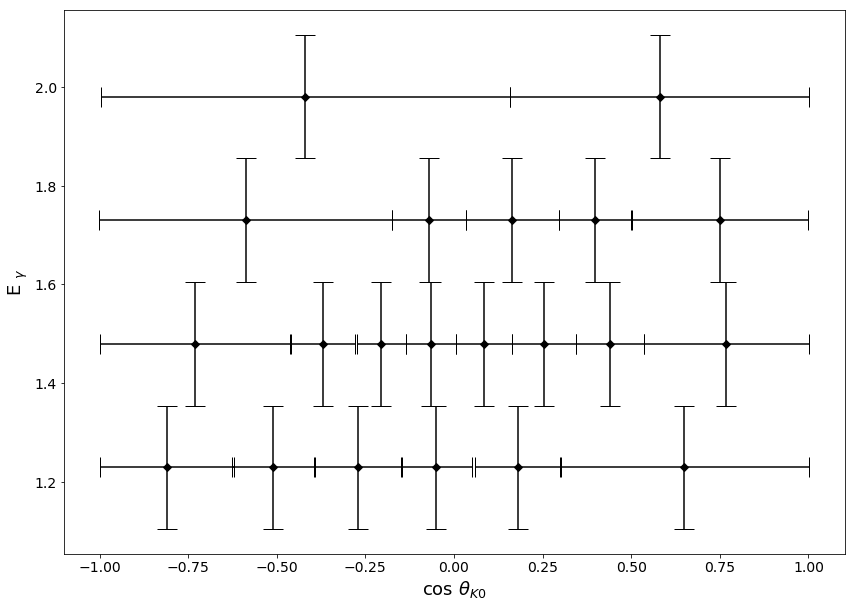

In [2]:
# bins
fig, axes = plt.subplots(1, 1, figsize=(14,10))

# Egamma 1.23
x=[-0.81,-0.51,-0.27,-0.05,0.18,0.65] 
y=[1.23,1.23,1.23,1.23,1.23,1.23]
x_err=[0.189,0.116,0.122,0.1,0.122,0.351]
y_err=[0.125,0.125,0.125,0.125,0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

#Egamma 1.48
x=[-0.73,-0.37,-0.205,-0.065,0.085,0.255,0.44,0.768] 
y=[1.48,1.48,1.48,1.48,1.48,1.48,1.48,1.48]
x_err=[0.268,0.09,0.07,0.07,0.08,0.09,0.095,0.233]
y_err=[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

# Egamma 1.73
x=[-0.588,-0.07,0.165,0.398,0.75] 
y=[1.73,1.73,1.73,1.73,1.73]
x_err=[0.413,0.105,0.13,0.103,0.25]
y_err=[0.125,0.125,0.125,0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

#Egamma 1.98
x=[-0.42,0.58] 
y=[1.98,1.98]
x_err=[0.577,0.4225]
y_err=[0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

axes.set_xlabel(r'cos $\theta _{K0}$', fontsize=18)
axes.set_ylabel(r'E $_{\gamma}$', fontsize=18)
plt.tick_params(labelsize=14)


## Read in csv data and extract bin centres from file name


In [3]:
# Definition of columns in csv
csv_labels = ['Obs','Val','FileName']
# Read file into a DataFrame...
#csv_df = pd.read_csv('/home/louise/g8K0Sig/code/AllObsAmp3/out1/CsvAllBins.csv', names=csv_labels)
csv_df = pd.read_csv('/home/louise/g8K0Sig/code/AllObsAmp3_test13/out1/CsvAllBins.csv', names=csv_labels)
mergedcsv_df = pd.read_csv('/home/louise/g8K0Sig/code/AllObsAmp3_test13/out1/MergedCsvAllBins.csv', names=csv_labels)


topDir = '/home/louise/public_html/html/images/st13/'

# Print first few rows as a check...
csv_df.head()

Obs       Val                    FileName
0   B  0.585229  costhK0CMS0.40_Egamma1.73_
1  Ox  0.142236  costhK0CMS0.40_Egamma1.73_
2  Oz -0.538279  costhK0CMS0.40_Egamma1.73_
3   R  0.595851  costhK0CMS0.40_Egamma1.73_
4   T  0.748429  costhK0CMS0.40_Egamma1.73_

In [4]:
# get the bin centres from the file name
file_str = 'costhK0CMS0.58_Egamma1.98_'
file_str.find('_Egamma')
file_str[10:file_str.find('_Egamma')] 
bins = file_str[10:file_str.find('_Egamma')], file_str[file_str.find('_Egamma')+7:len(file_str)-1]
print(bins)

('0.58', '1.98')


In [5]:
# Create new column in df with costh bin centre
def get_costh(file_str):
    return float(file_str[10:file_str.find('_Egamma')])

csv_df['costh'] = csv_df['FileName'].apply(get_costh)
mergedcsv_df['costh'] = mergedcsv_df['FileName'].apply(get_costh)
csv_df.head()

Obs       Val                    FileName  costh
0   B  0.585229  costhK0CMS0.40_Egamma1.73_    0.4
1  Ox  0.142236  costhK0CMS0.40_Egamma1.73_    0.4
2  Oz -0.538279  costhK0CMS0.40_Egamma1.73_    0.4
3   R  0.595851  costhK0CMS0.40_Egamma1.73_    0.4
4   T  0.748429  costhK0CMS0.40_Egamma1.73_    0.4

In [6]:
# Create new column in df with Egamma bin centre
def get_Egamma(file_str):
    return float(file_str[file_str.find('_Egamma')+7:len(file_str)-1])

csv_df['Egamma'] = csv_df['FileName'].apply(get_Egamma)
mergedcsv_df['Egamma'] = mergedcsv_df['FileName'].apply(get_Egamma)
csv_df.head()

Obs       Val                    FileName  costh  Egamma
0   B  0.585229  costhK0CMS0.40_Egamma1.73_    0.4    1.73
1  Ox  0.142236  costhK0CMS0.40_Egamma1.73_    0.4    1.73
2  Oz -0.538279  costhK0CMS0.40_Egamma1.73_    0.4    1.73
3   R  0.595851  costhK0CMS0.40_Egamma1.73_    0.4    1.73
4   T  0.748429  costhK0CMS0.40_Egamma1.73_    0.4    1.73

## cos $\theta _{K0}$ dependence for each E $_{\gamma}$ bin

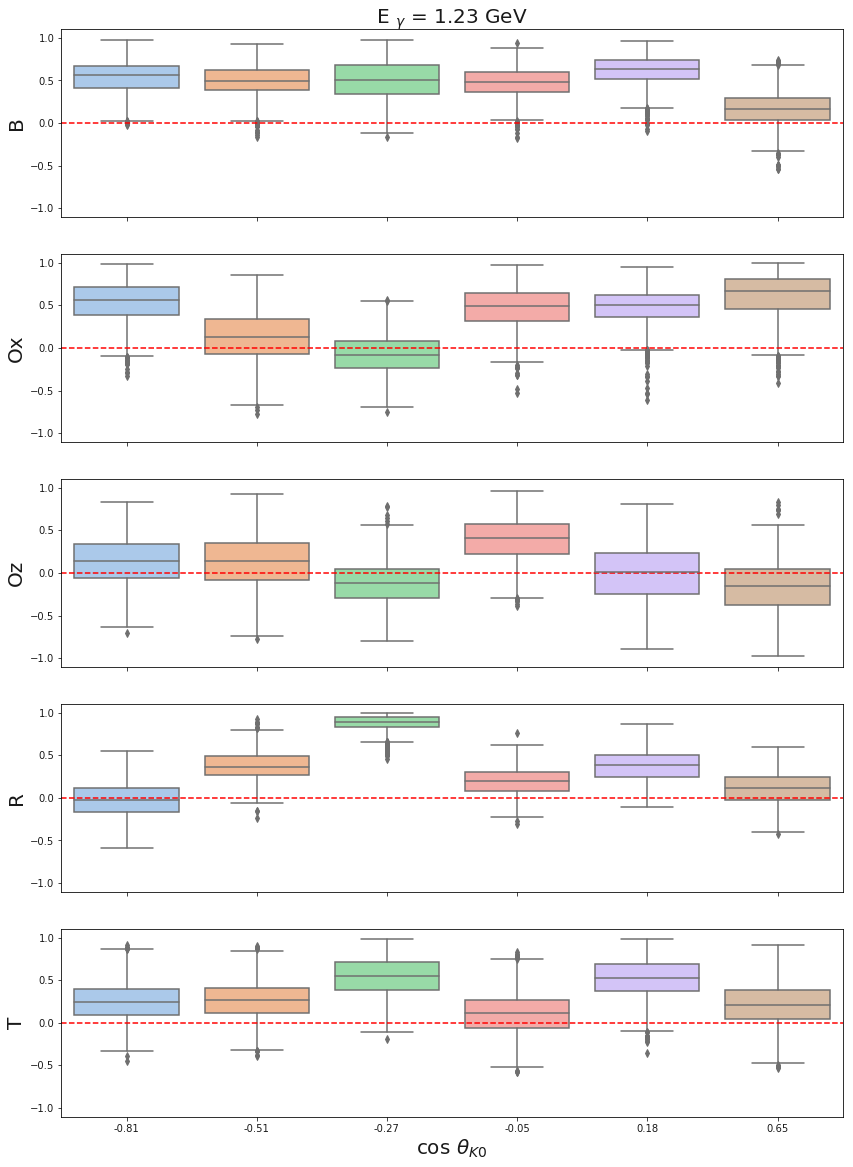

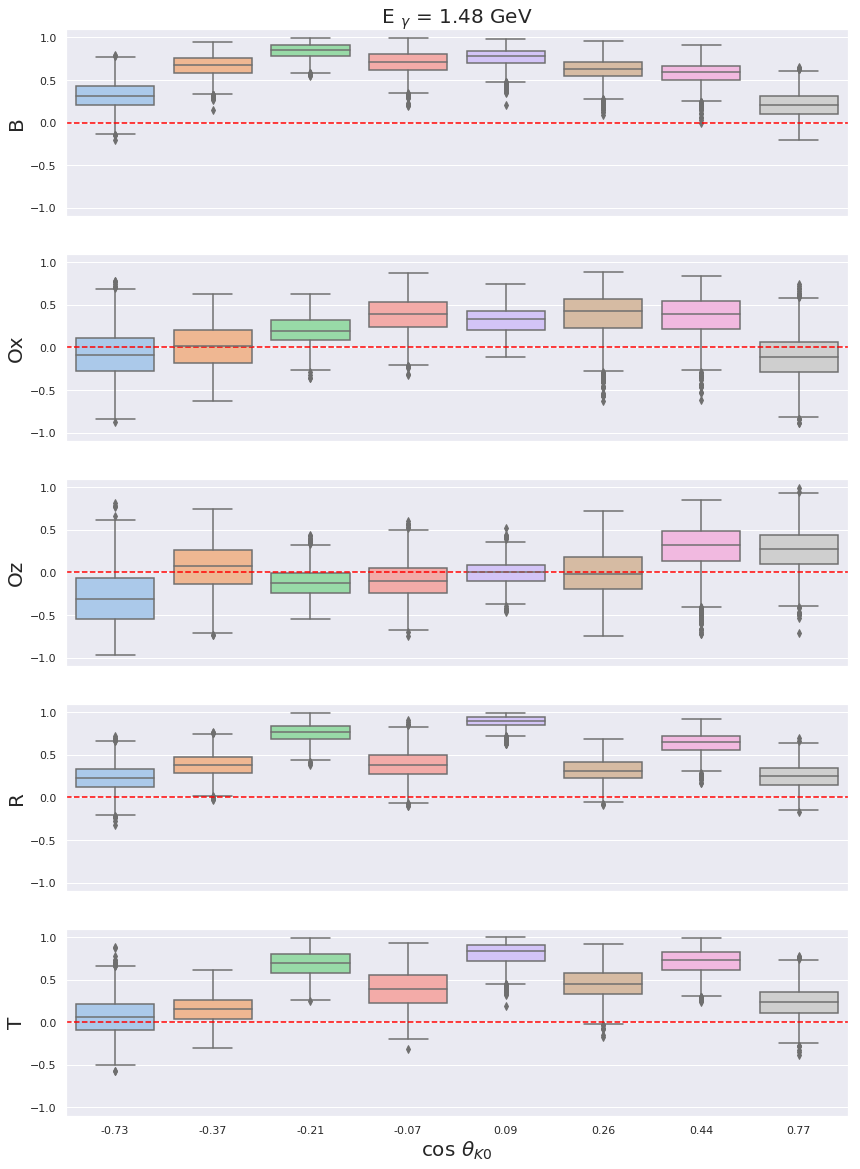

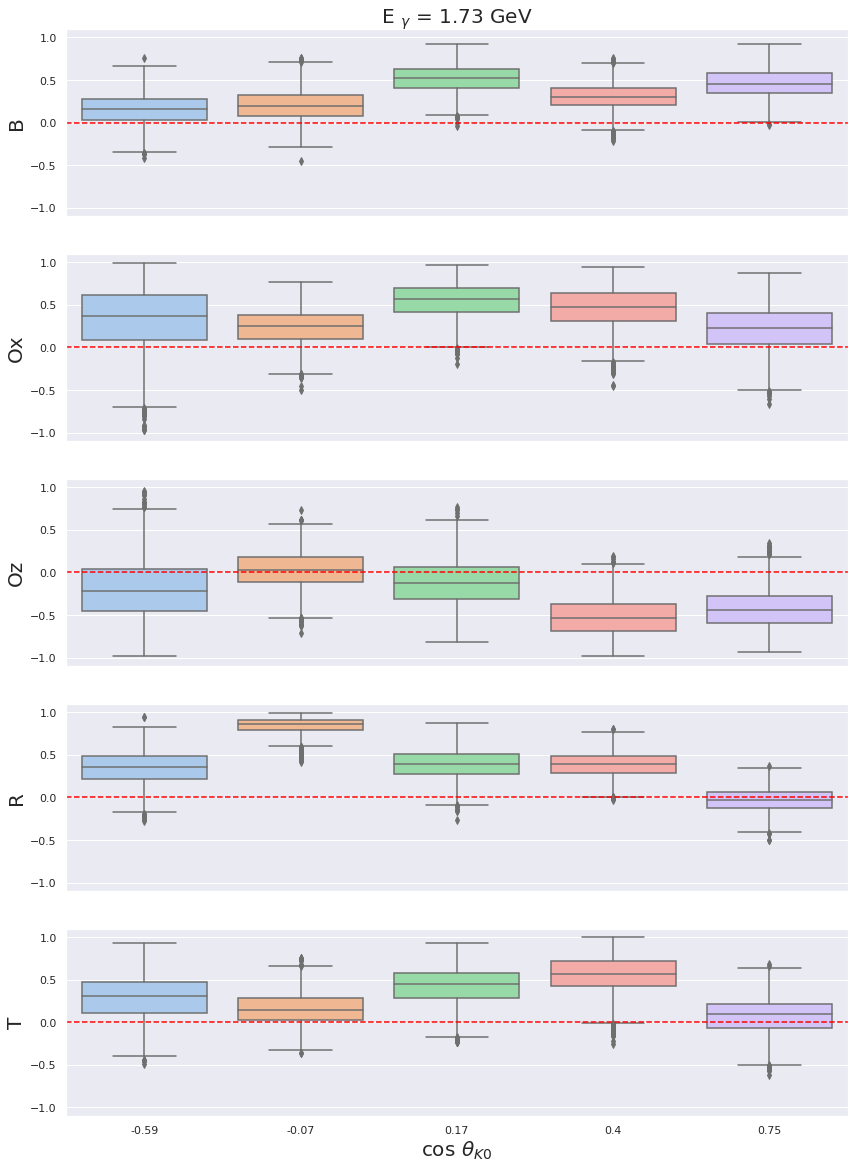

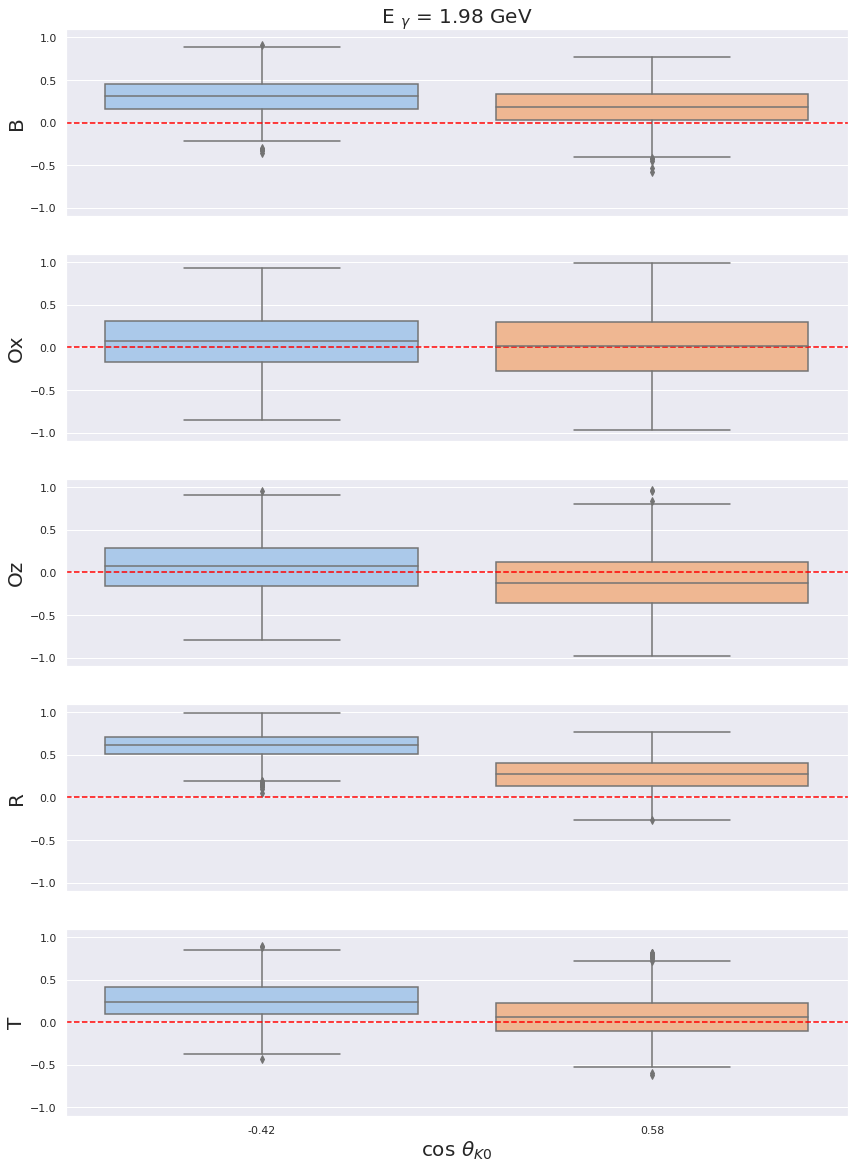

In [7]:
# Plot each bin and observable
# costh dependance

obs_labels = ['B','Ox','Oz','R','T']
n_obs = len(obs_labels)
Eg_bins = [1.23, 1.48, 1.73, 1.98]

for bin_idx in range(len(Eg_bins)):
    fig, ax = plt.subplots(n_obs, 1, sharex=True, figsize=(14,20))
    sns.set(palette="pastel")

    ax[0].set_title(r'E $_{\gamma}$ = ' + str(Eg_bins[bin_idx]) + ' GeV', fontsize=20)
    for i in range(n_obs):
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[bin_idx]]
        dfObs = dfEg[dfEg['Obs']==obs_labels[i]]
        sns.boxplot(data=dfObs, x="costh", y="Val", ax=ax[i]) 

        ax[i].set_ylim(-1.1,1.1)
        ax[i].axhline(0.0,color='red',linestyle='--')
        ax[i].set_ylabel(obs_labels[i], fontsize=20)

        ax[i].set_xlabel('')

    ax[n_obs-1].set_xlabel(r'cos $\theta _{K0}$', fontsize=20)
    plt.show()
    

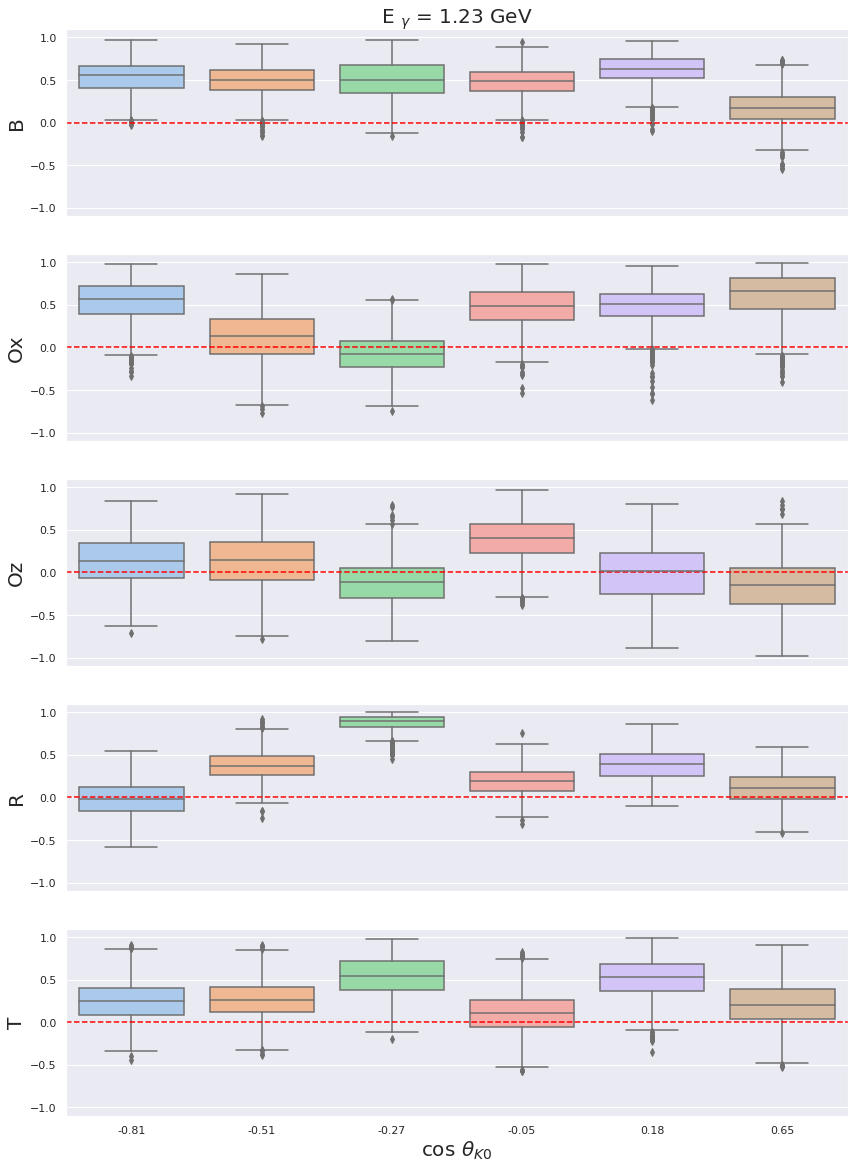

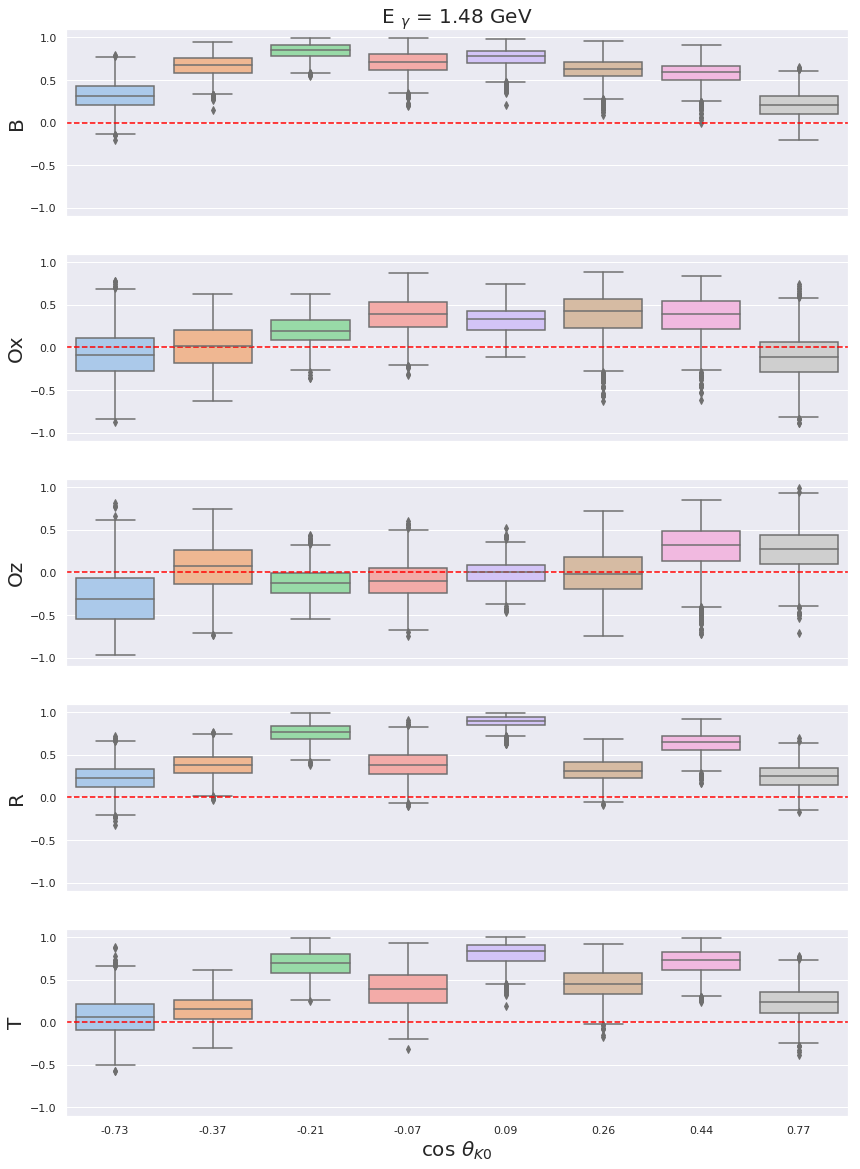

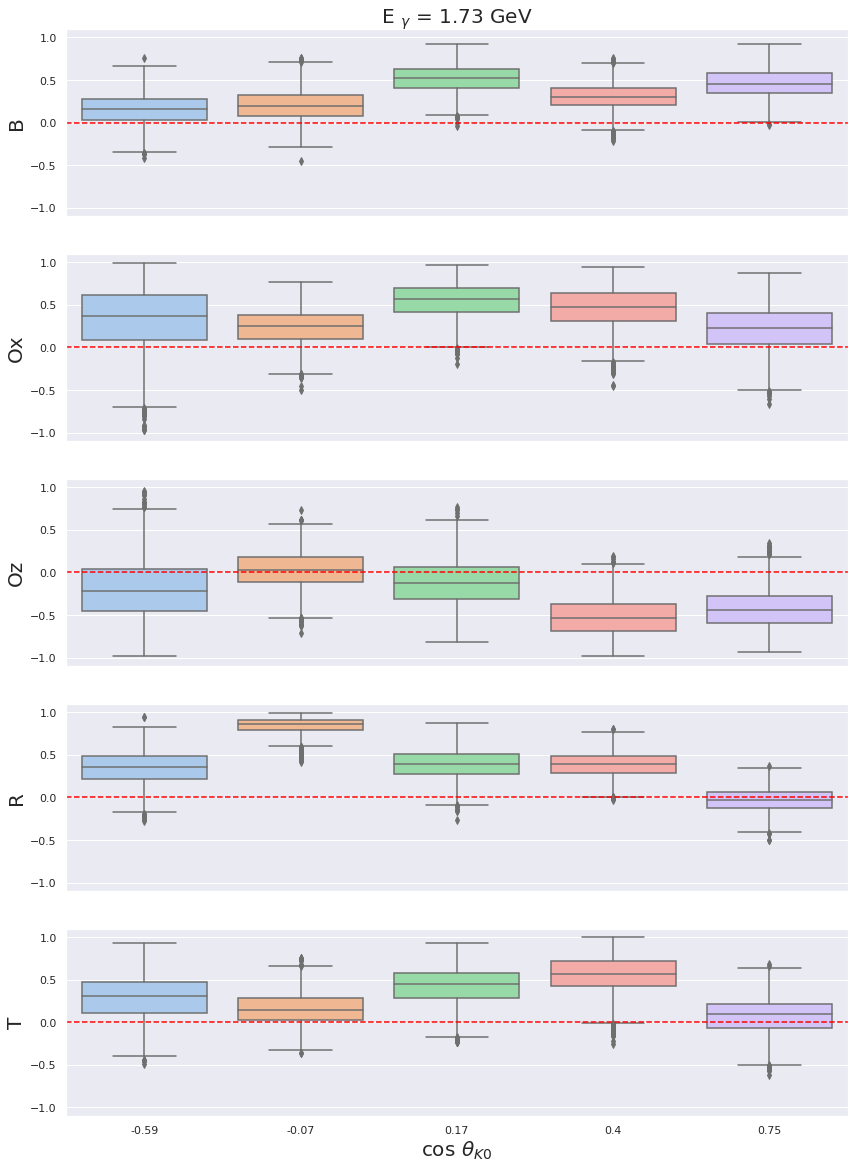

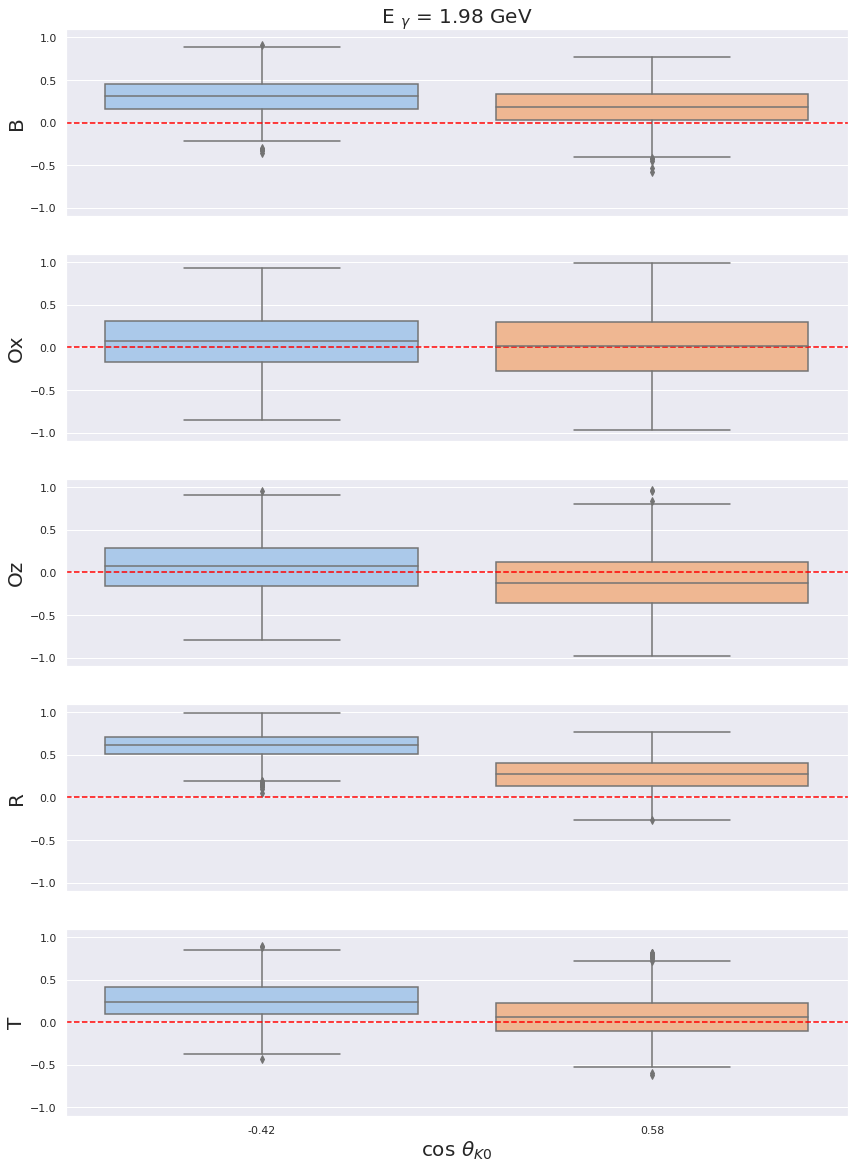

In [8]:
# Plot each bin and observable
# costh dependance

imageDir = topDir+'MCMCBox/'

obs_labels = ['B','Ox','Oz','R','T']
n_obs = len(obs_labels)
Eg_bins = [1.23, 1.48, 1.73, 1.98]

for bin_idx in range(len(Eg_bins)):
    fig, ax = plt.subplots(n_obs, 1, sharex=True, figsize=(14,20))
    sns.set(palette="pastel")

    ax[0].set_title(r'E $_{\gamma}$ = ' + str(Eg_bins[bin_idx]) + ' GeV', fontsize=20)
    for i in range(n_obs):
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[bin_idx]]
        dfObs = dfEg[dfEg['Obs']==obs_labels[i]]
        sns.boxplot(data=dfObs, x="costh", y="Val", ax=ax[i]) 

        ax[i].set_ylim(-1.1,1.1)
        ax[i].axhline(0.0,color='red',linestyle='--')
        ax[i].set_ylabel(obs_labels[i], fontsize=20)

        ax[i].set_xlabel('')

    ax[n_obs-1].set_xlabel(r'cos $\theta _{K0}$', fontsize=20)
    #plt.show()
    plt.savefig(imageDir+"box"+str(bin_idx)+".png")
    

## cos $\theta _{K0}$ dependence for all E $_{\gamma}$ bins

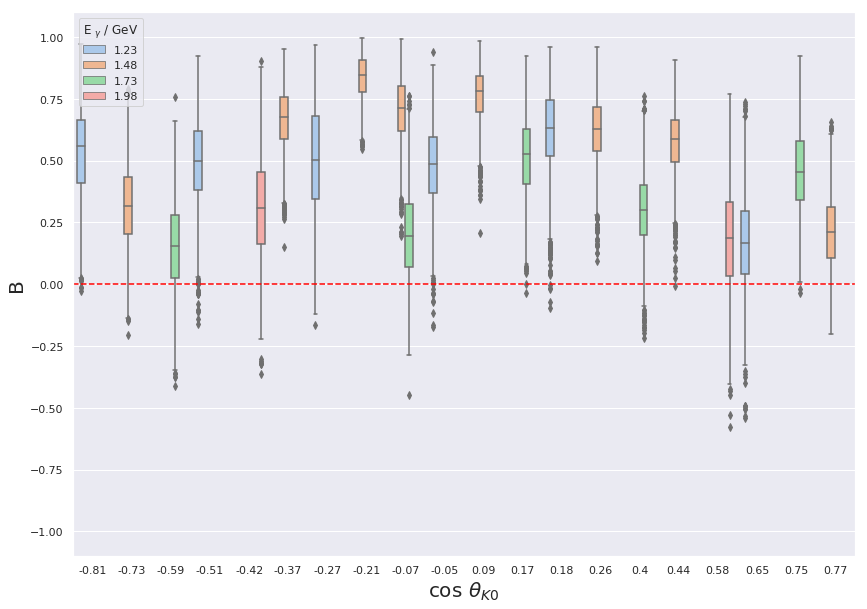

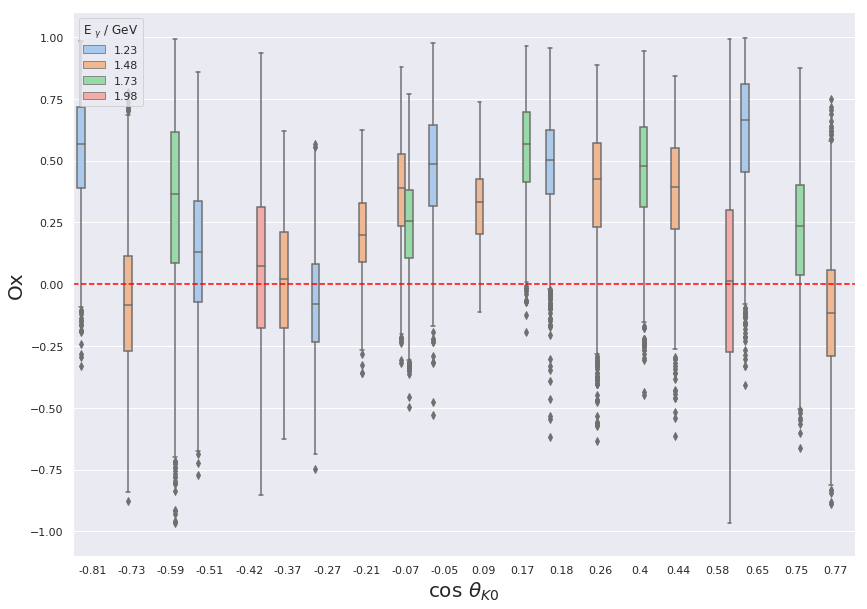

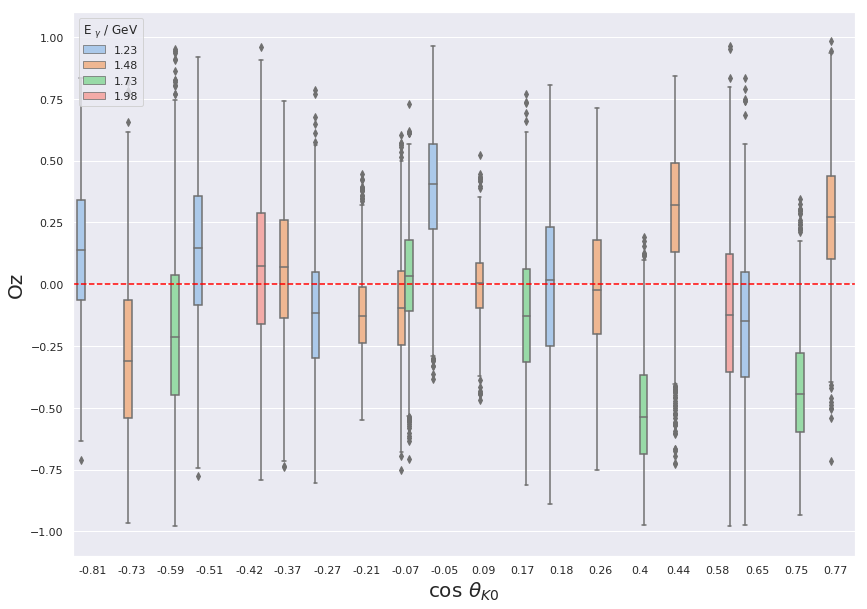

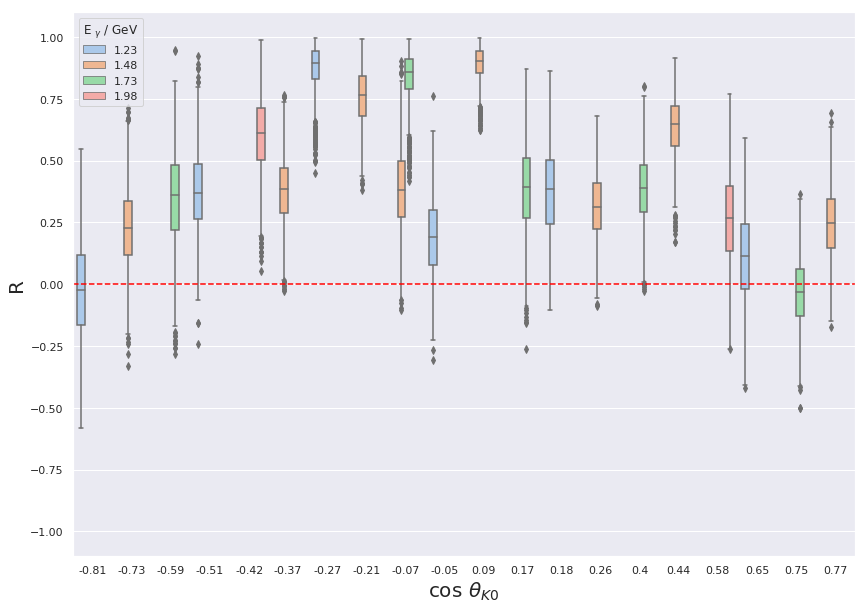

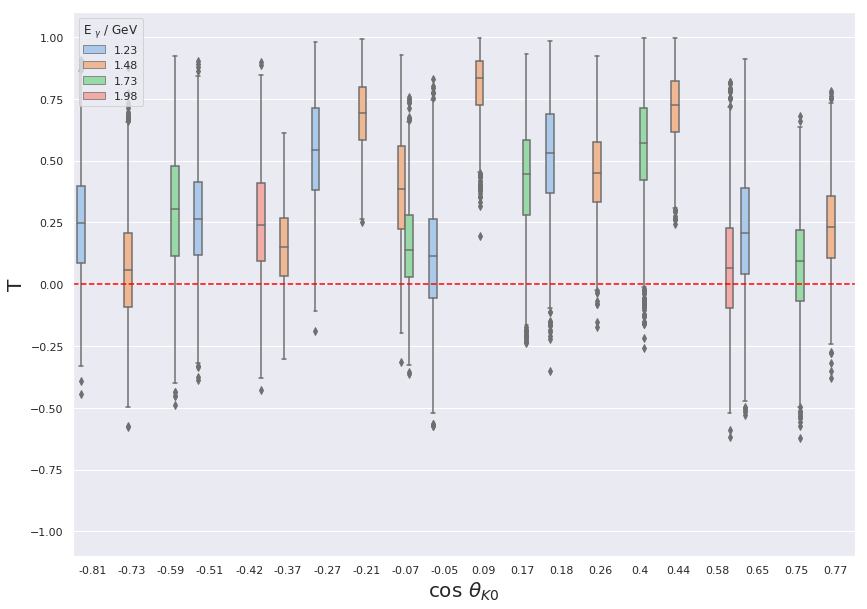

In [9]:
for i in range(n_obs):
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14,10))
    dfObs = csv_df[csv_df['Obs']==obs_labels[i]]
    sns.boxplot(data=dfObs, x="costh", y="Val", hue='Egamma') 
    ax.set_ylim(-1.1,1.1)
    ax.axhline(0.0,color='red',linestyle='--')
    ax.set_ylabel(obs_labels[i], fontsize=20)

    ax.legend(loc="upper left", title=r'E $_{\gamma}$ / GeV')
    ax.set_xlabel(r'cos $\theta _{K0}$', fontsize=20)     
    plt.show()
    


## E $_{\gamma}$ dependence for all cos $\theta _{K0}$ bins

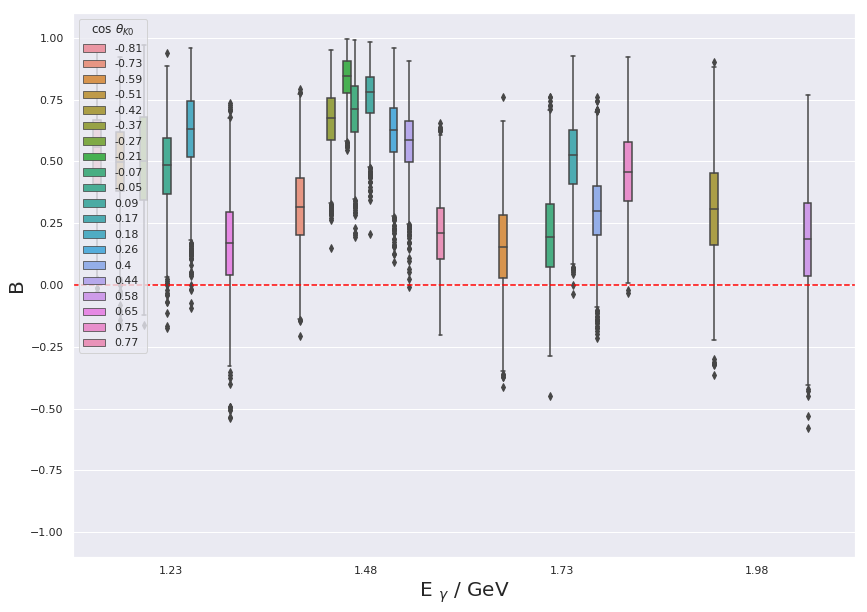

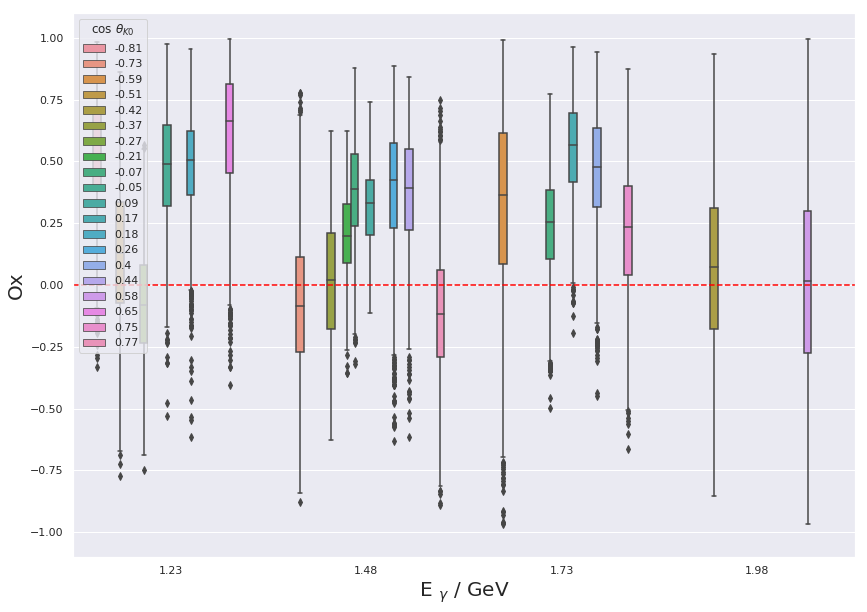

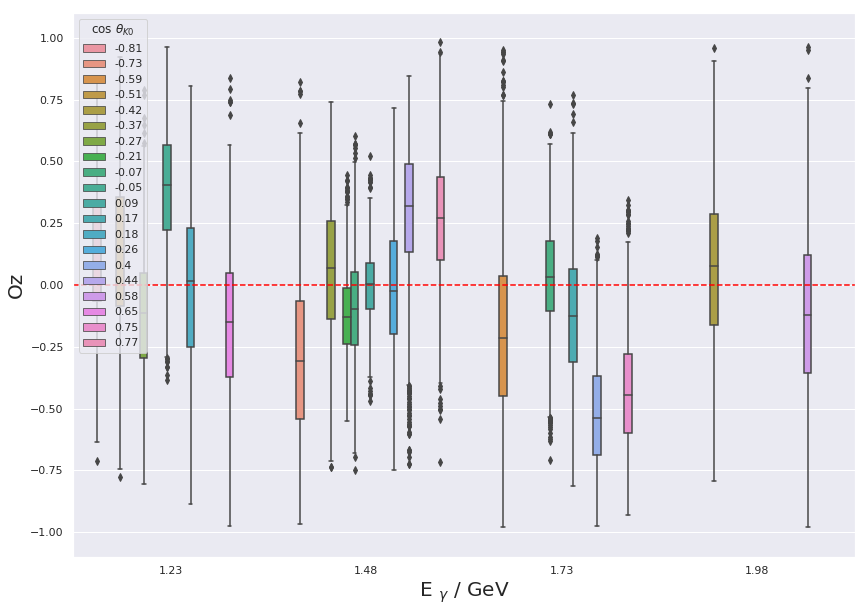

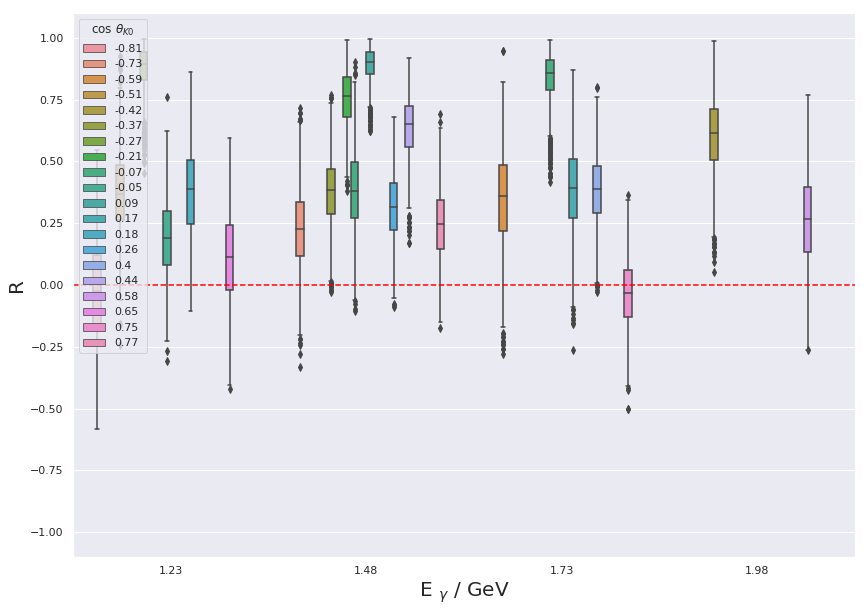

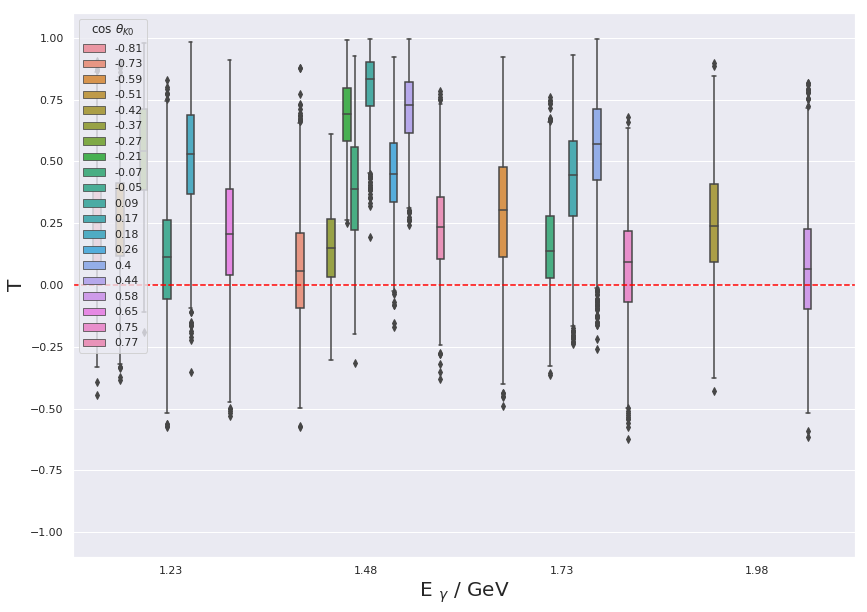

In [10]:
# Plot each bin and observable
# Egamma dependance
for i in range(n_obs):
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14,10))
    dfObs = csv_df[csv_df['Obs']==obs_labels[i]]
    sns.boxplot(data=dfObs, x="Egamma", y="Val", hue='costh') 
    ax.set_ylim(-1.1,1.1)
    ax.axhline(0.0,color='red',linestyle='--')
    ax.set_ylabel(obs_labels[i], fontsize=20)

    ax.legend(loc="upper left", title=r'cos $\theta _{K0}$')
    ax.set_xlabel(r'E $_{\gamma}$ / GeV', fontsize=20)     
    plt.show()
    

## Corner plots for all bins

In [11]:
# combine the rows into 1 row with 5 values

# get the bin
dfEg = csv_df[csv_df['Egamma']==1.23]
dfCosth = dfEg[dfEg['costh']==-0.81]

# get df for each obs
dfB = dfCosth[dfCosth['Obs']=='B']
dfB = dfB.reset_index()
dfOx = dfCosth[dfCosth['Obs']=='Ox']
dfOx = dfOx.reset_index()
dfOz = dfCosth[dfCosth['Obs']=='Oz']
dfOz = dfOz.reset_index()
dfR = dfCosth[dfCosth['Obs']=='R']
dfR = dfR.reset_index()
dfT = dfCosth[dfCosth['Obs']=='T']
dfT = dfT.reset_index()

# merge them
pd.concat([dfB['Val'], dfOx['Val'], dfOz['Val'], dfR['Val'], dfT['Val']], 
          axis=1, keys=['B','Ox','Oz','R','T'])


B        Ox        Oz         R         T
0     0.605661  0.399458 -0.077500  0.247014  0.312831
1     0.541061  0.411530 -0.174907  0.123660  0.200259
2     0.510158  0.429440 -0.143811  0.199321  0.281077
3     0.574404  0.390854 -0.202544  0.042024  0.113058
4     0.652498  0.172932 -0.198797 -0.149181 -0.091182
5     0.565112  0.175308 -0.068935  0.064773  0.137357
6     0.596891  0.210222 -0.093963  0.133112  0.200393
7     0.654443  0.205651 -0.191855 -0.028664  0.029011
8     0.654443  0.205651 -0.191855 -0.028664  0.029011
9     0.461258 -0.281924  0.283269 -0.142084  0.142390
10    0.494893 -0.331093  0.246087 -0.122337  0.122650
11    0.400009 -0.145154  0.056079 -0.051100  0.051393
12    0.444956 -0.193502  0.083786  0.027641  0.122456
13    0.303855 -0.058924 -0.046716  0.122592  0.012847
14    0.303855 -0.058924 -0.046716  0.122592  0.012847
15    0.455206  0.386843 -0.418973  0.252902 -0.101741
16    0.353551  0.754767  0.029409  0.486686  0.065868
17    0.497388  0.718096 -0.003757  0.432137  0.179135
18    0.352737  0.792618  0.174142  0.293789  0.258432
19    0.445144  0.774666  0.418230  0.245547  0.344397
20    0.453894  0.763429  0.196477  0.225904  0.323195
21    0.524664  0.665142  0.029416  0.067040  0.151723
22    0.627158  0.274782  0.456413  0.004323  0.229146
23    0.432173  0.497401  0.194603 -0.116026  0.321519
24    0.437914  0.492407  0.197272 -0.124963  0.308158
25    0.490548  0.740107  0.176554 -0.206902  0.185662
26    0.438391  0.775199  0.194940 -0.125706  0.307049
27    0.352615  0.707927  0.418071 -0.297637  0.201213
28    0.352615  0.707927  0.418071 -0.297637  0.201213
29    0.585445  0.408162  0.632862 -0.176737  0.063715
...        ...       ...       ...       ...       ...
1920  0.609563  0.634312  0.467373 -0.100927 -0.064798
1921  0.648950  0.629860  0.420440  0.010135  0.042619
1922  0.648950  0.629860  0.420440  0.010135  0.042619
1923  0.674807  0.682011  0.253995 -0.064266 -0.034174
1924  0.674807  0.682011  0.253995 -0.064266 -0.034174
1925  0.712660  0.602297  0.314359  0.059617  0.086207
1926  0.697624  0.512010  0.498267  0.115064  0.143045
1927  0.462815  0.755687  0.061382 -0.039168  0.261576
1928  0.676322  0.607664  0.372579  0.101072  0.153798
1929  0.559904  0.509443  0.630853 -0.222247 -0.150556
1930  0.642640  0.510769  0.567868 -0.180995 -0.211580
1931  0.640184  0.214892  0.645645 -0.182220 -0.209769
1932  0.747381  0.363201  0.161377 -0.425856 -0.445197
1933  0.669431  0.136961  0.676290 -0.248692 -0.274002
1934  0.637866  0.113601  0.714362 -0.176953 -0.204680
1935  0.654477  0.135007  0.684019 -0.188889 -0.196614
1936  0.654477  0.135007  0.684019 -0.188889 -0.196614
1937  0.334617  0.679574  0.399738 -0.345701  0.034727
1938  0.331913  0.678516  0.399455 -0.351171  0.030804
1939  0.473504  0.294708  0.795428 -0.064811  0.236210
1940  0.531322  0.448114  0.697822 -0.028115  0.206240
1941  0.609389  0.412486  0.669012  0.021432  0.165774
1942  0.629797  0.430217  0.640830  0.072558  0.209358
1943  0.598648  0.591393  0.314202  0.090283  0.186244
1944  0.604392  0.592932  0.311430  0.103303  0.197890
1945  0.647488  0.584787  0.339479 -0.016887  0.067397
1946  0.546509  0.494948  0.671122  0.264729  0.373156
1947  0.447409  0.725681  0.106747  0.104051  0.236172
1948  0.556532  0.797812 -0.110552 -0.113972 -0.007941
1949  0.443685  0.833869 -0.321992  0.111491  0.244503

[1950 rows x 5 columns]

In [12]:
# corner plots for all bins
imageDir = topDir+'MCMCCorner/'

Eg_bins = [1.23,1.48,1.73,1.98]
costh_bins = [[-0.81,-0.51,-0.27,-0.05,0.18,0.65],
              [-0.73,-0.37,-0.21,-0.07,0.09,0.26,0.44,0.77],
              [-0.59,-0.07,0.17,0.40,0.75],
              [-0.42, 0.58]
             ]

for ebin_idx in range(len(Eg_bins)):
    for tbin_idx in range(len(costh_bins[ebin_idx])):
        # get the bin
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[ebin_idx]]
        dfCosth = dfEg[dfEg['costh']==costh_bins[ebin_idx][tbin_idx]]

        # get df for each obs
        dfB = dfCosth[dfCosth['Obs']=='B']
        dfB = dfB.reset_index()
        dfOx = dfCosth[dfCosth['Obs']=='Ox']
        dfOx = dfOx.reset_index()
        dfOz = dfCosth[dfCosth['Obs']=='Oz']
        dfOz = dfOz.reset_index()
        dfR = dfCosth[dfCosth['Obs']=='R']
        dfR = dfR.reset_index()
        dfT = dfCosth[dfCosth['Obs']=='T']
        dfT = dfT.reset_index()

        # merge them
        dfObs = pd.concat([dfB['Val'], dfOx['Val'], dfOz['Val'], dfR['Val'], dfT['Val']], 
                  axis=1, keys=['B','Ox','Oz','R','T'])
        
        # corner plot for one bin
        import corner 

        fig = corner.corner(dfObs,
                            color='royalblue', 
                            range=[(-1.1,1.1),(-1.1,1.1),(-1.1,1.1),(-1.1,1.1),(-1.1,1.1)],
                            bins=50,
                            truths=dfObs.mean().values, truth_color='red',
                            label_kwargs={'fontsize':30, 'labelpad':20},
                            hist_kwargs = {'histtype':'stepfilled','alpha':0.8},
                            labels=['$\Sigma$','$O_x$','$O_z$','P','T'])
        fig.suptitle(r'E $_{\gamma}$ = ' + str(Eg_bins[ebin_idx]) + ' GeV\n '+
                      r'cos $\theta _{K^0}$ = ' + str(costh_bins[ebin_idx][tbin_idx]), fontsize=20)

        #plt.show()
        plt.savefig(imageDir+str(ebin_idx)+str(tbin_idx)+"corner.png")
        plt.clf()

/home/clas12/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

  Obs       Val                    FileName  costh  Egamma  binStart
0   B  0.585229  costhK0CMS0.40_Egamma1.73_    0.4    1.73      0.58
1  Ox  0.142236  costhK0CMS0.40_Egamma1.73_    0.4    1.73      0.14
2  Oz -0.538279  costhK0CMS0.40_Egamma1.73_    0.4    1.73     -0.54
3   R  0.595851  costhK0CMS0.40_Egamma1.73_    0.4    1.73      0.58
4   T  0.748429  costhK0CMS0.40_Egamma1.73_    0.4    1.73      0.74


<Figure size 432x288 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

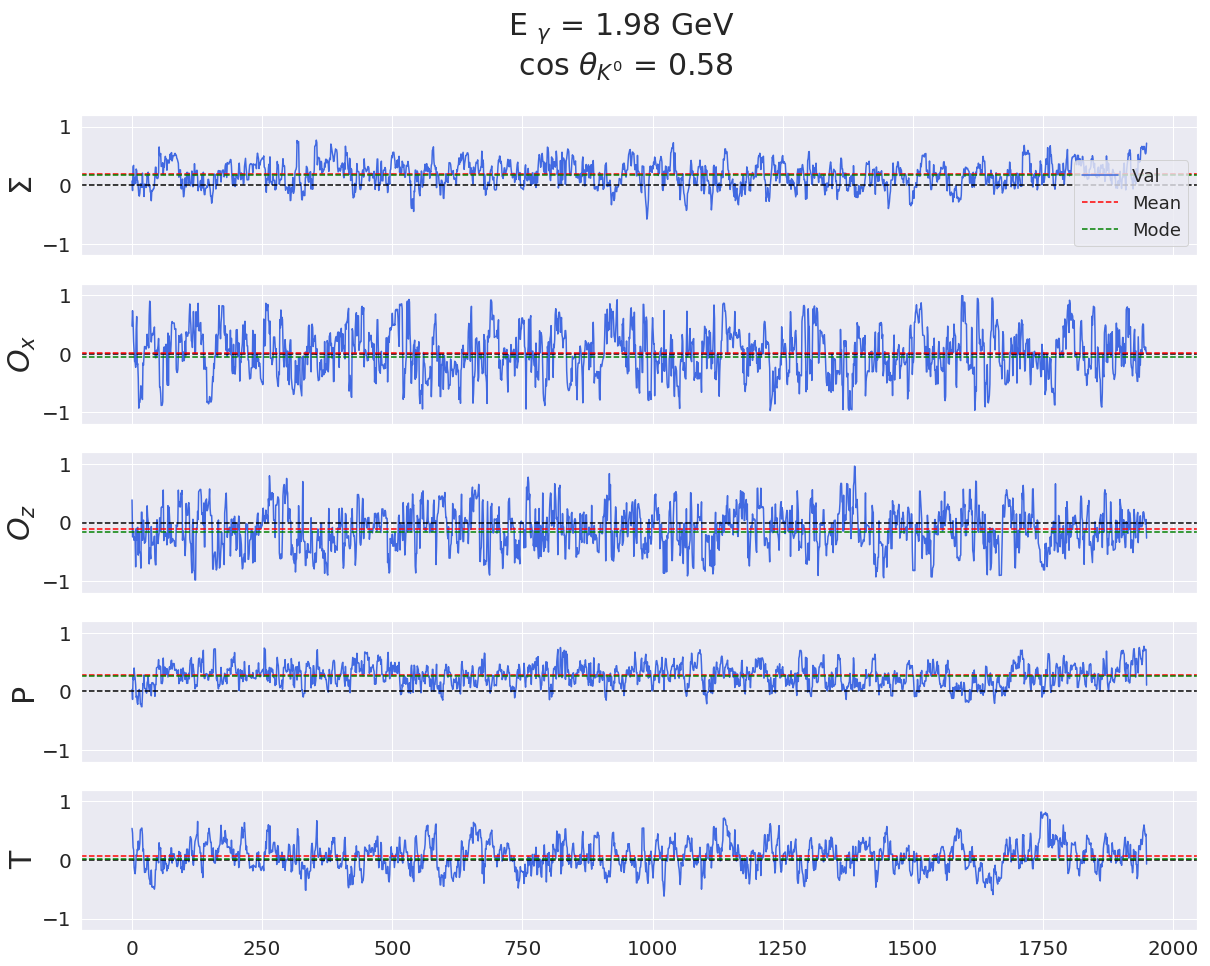

In [32]:
# time series plots for all bins
imageDir = topDir+'MCMCTime/'

# obs
n_obs = len(obs_labels)
axLabels=['$\Sigma$','$O_x$','$O_z$','P','T']

# add a column to the dataframe for bin start (0.02 bin width)
csv_df['binStart'] = ((csv_df['Val'] * 100) // 2) / 50
print(csv_df.head())

for ebin_idx in range(len(Eg_bins)):
    for tbin_idx in range(len(costh_bins[ebin_idx])):
        plt.clf()
        fig, axes = plt.subplots(n_obs, sharex=True, figsize=(20, 15))
        
        # get the bin
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[ebin_idx]]
        dfCosth = dfEg[dfEg['costh']==costh_bins[ebin_idx][tbin_idx]]
        
        # time series plot for one bin
        for i in range(n_obs):
            dfB = dfCosth[dfCosth['Obs']==obs_labels[i]]
            dfB = dfB.reset_index()

            #print(str(Eg_bins[ebin_idx]) + ' ' + str(costh_bins[ebin_idx][tbin_idx]))
            #print('Obs ' + obs_labels[i])
            #print('Mode binStart')
            #print(dfB['binStart'].mode()[0])
            #print('Mean')
            #print(dfB['Val'].mean())
            axes[i].plot(dfB['Val'], color="royalblue")
            axes[i].set_ylabel(axLabels[i], fontsize=30)
            axes[i].set_ylim(-1.2,1.2)
            axes[i].tick_params(axis='y', labelsize=20 )
            axes[i].axhline(0.0, color="black", linestyle='--')
            axes[i].axhline(dfB['Val'].mean(), color="red", linestyle='--',label='Mean')
            axes[i].axhline(dfB['binStart'].mode()[0], color="green", linestyle='--', label='Mode')
            if (i==0):
                axes[i].legend(fontsize=18, loc="lower right")

        fig.suptitle(r'E $_{\gamma}$ = ' + str(Eg_bins[ebin_idx]) + ' GeV\n '+
                      r'cos $\theta _{K^0}$ = ' + str(costh_bins[ebin_idx][tbin_idx]), fontsize=30)
        #fig.legend(fontsize=14, loc="lower right")
        plt.xticks(fontsize=20)
        plt.savefig(imageDir+str(ebin_idx)+str(tbin_idx)+"series.png")
        #plt.clf()

  Obs       Val                    FileName  costh  Egamma  binStart
0   B  0.585229  costhK0CMS0.40_Egamma1.73_    0.4    1.73      0.58
1  Ox  0.142236  costhK0CMS0.40_Egamma1.73_    0.4    1.73      0.14
2  Oz -0.538279  costhK0CMS0.40_Egamma1.73_    0.4    1.73     -0.54
3   R  0.595851  costhK0CMS0.40_Egamma1.73_    0.4    1.73      0.58
4   T  0.748429  costhK0CMS0.40_Egamma1.73_    0.4    1.73      0.74


<Figure size 432x288 with 0 Axes>

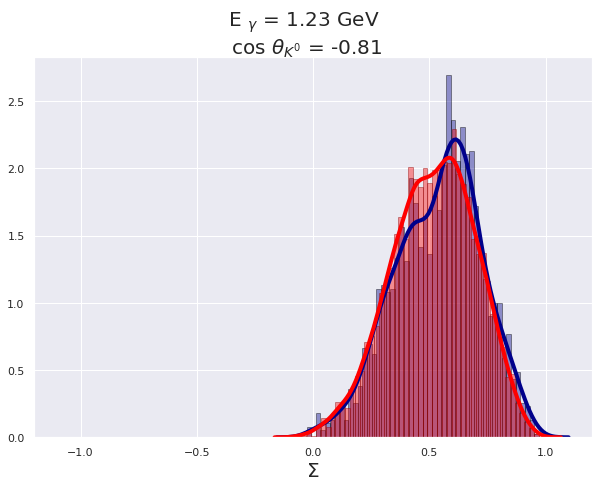

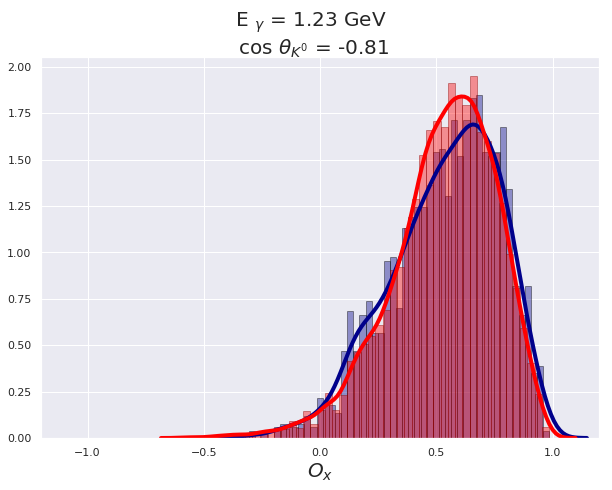

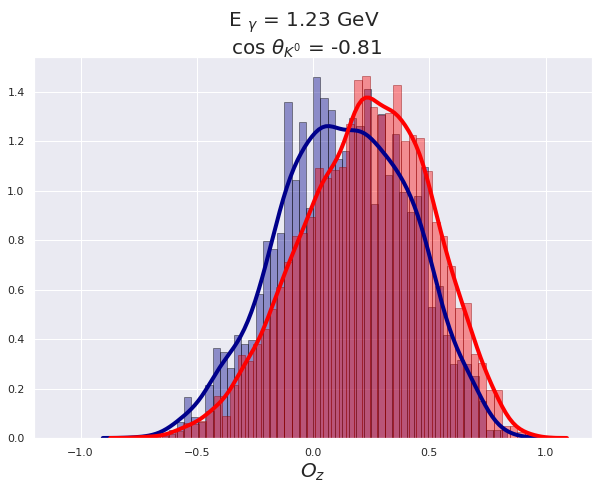

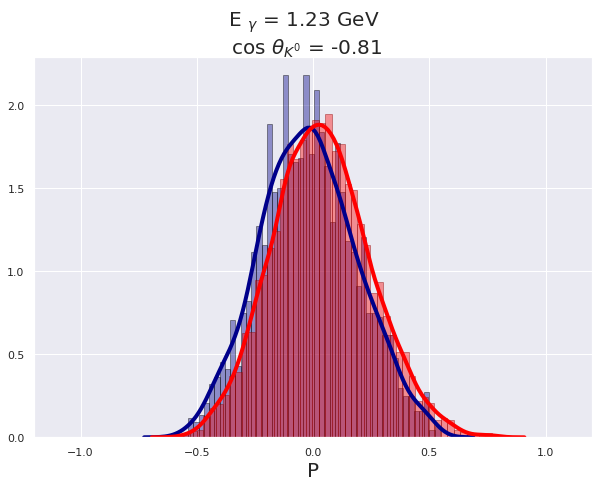

<Figure size 720x504 with 0 Axes>

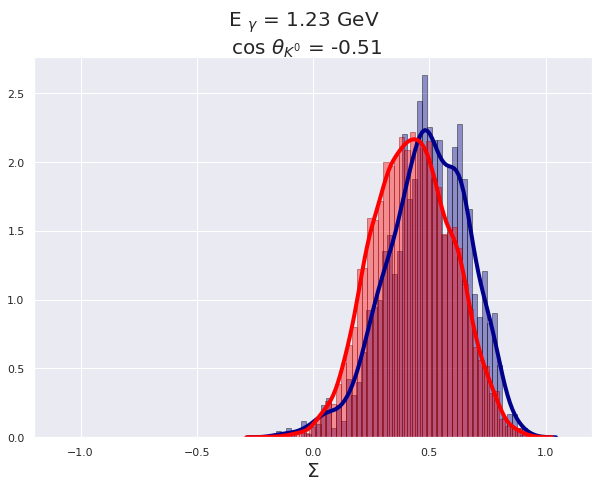

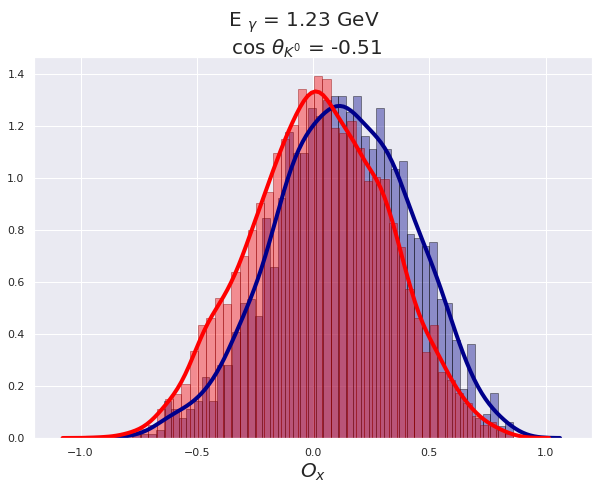

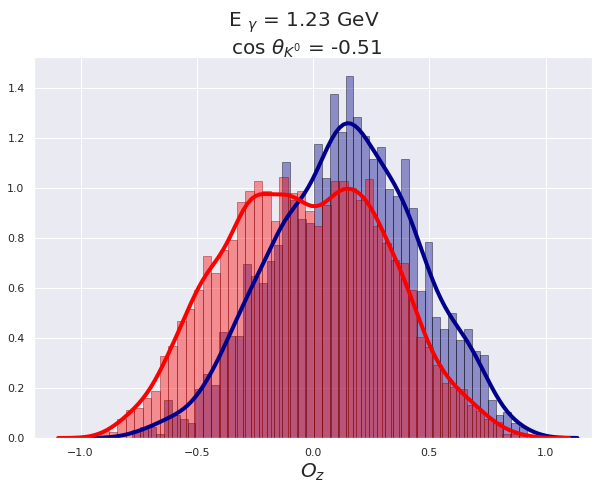

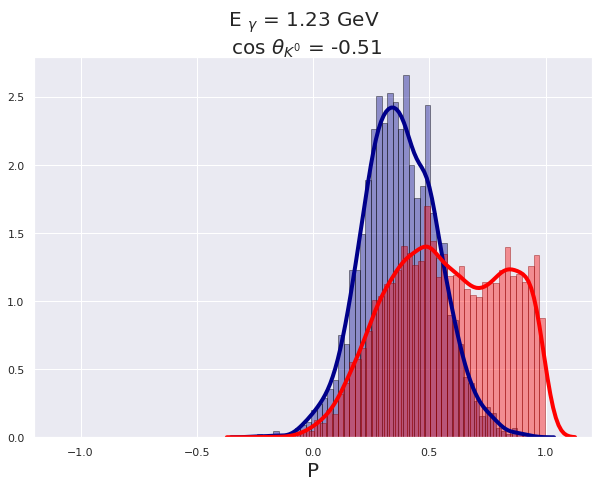

<Figure size 720x504 with 0 Axes>

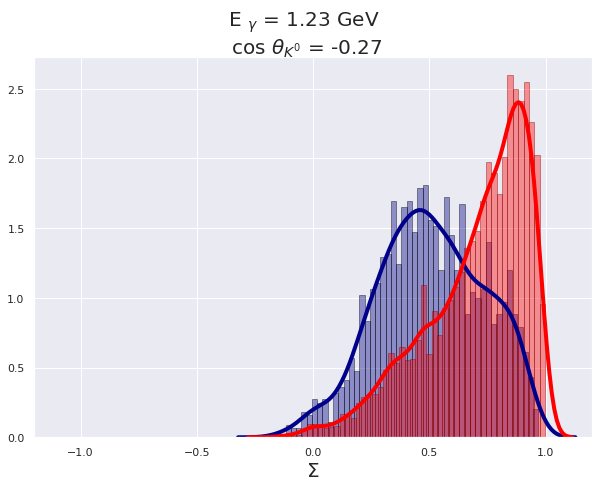

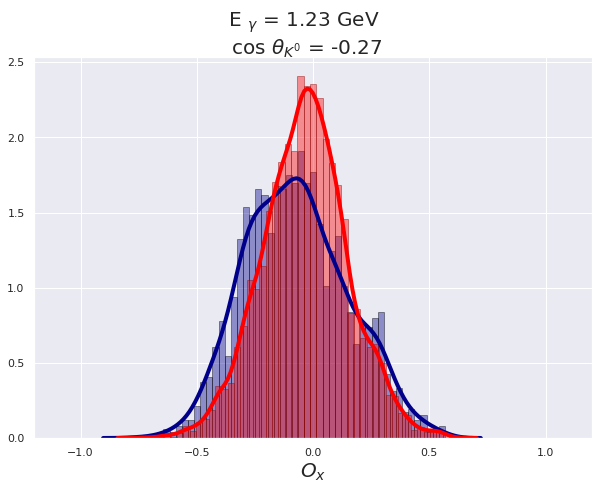

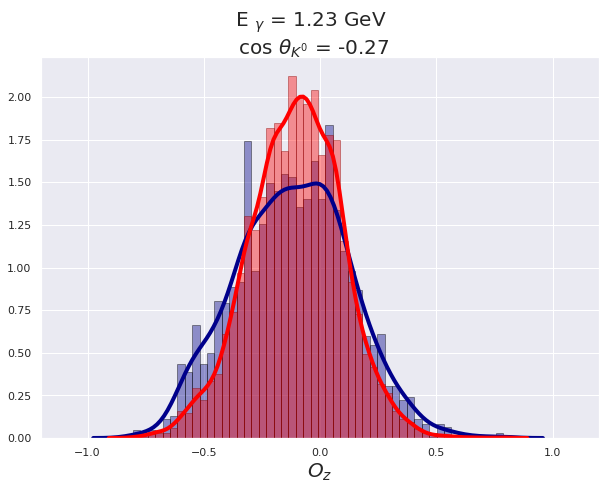

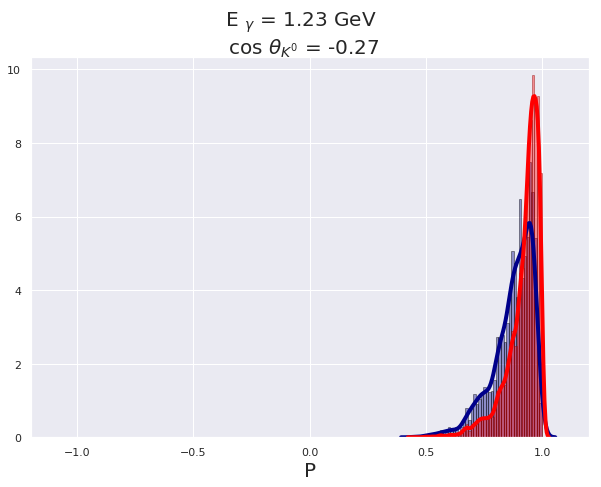

<Figure size 720x504 with 0 Axes>

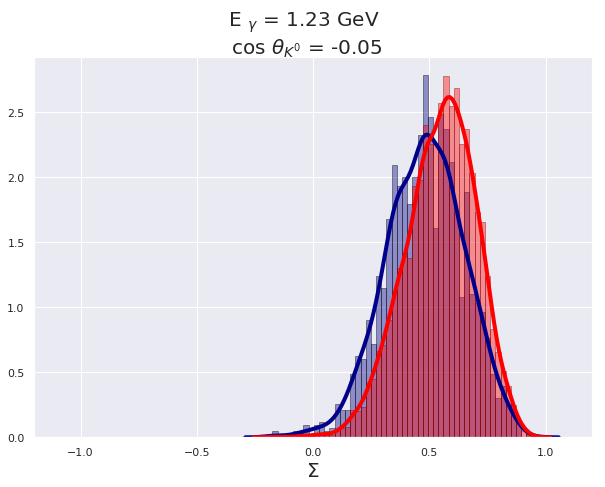

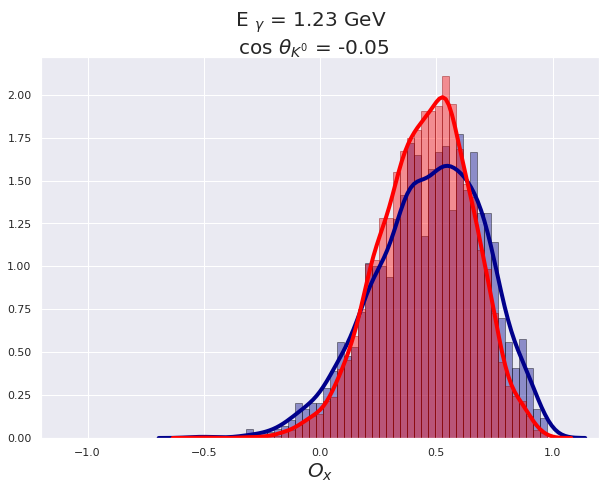

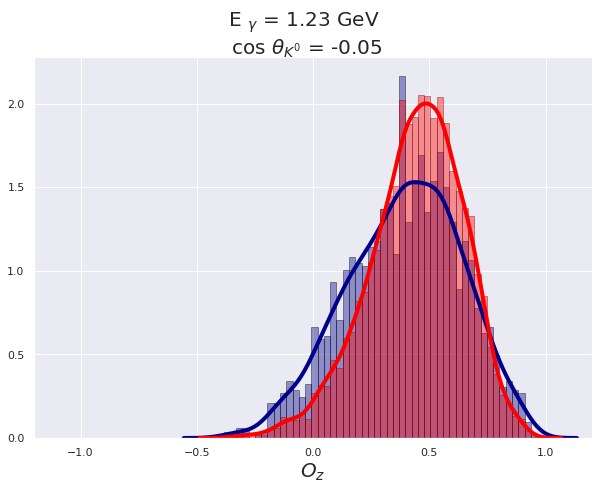

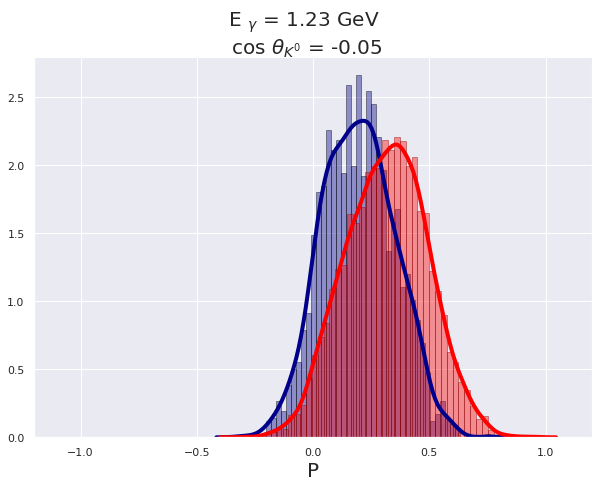

<Figure size 720x504 with 0 Axes>

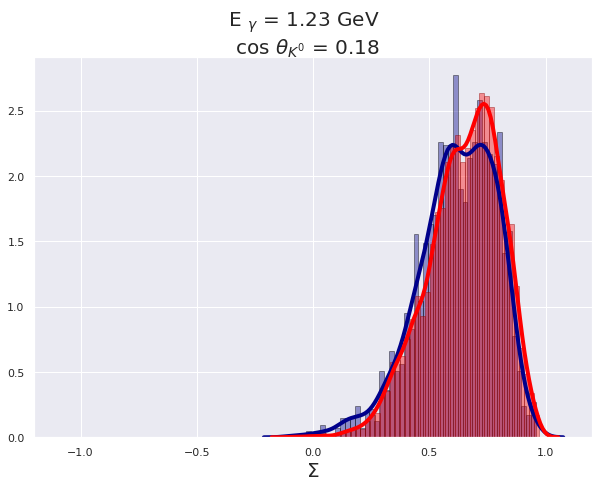

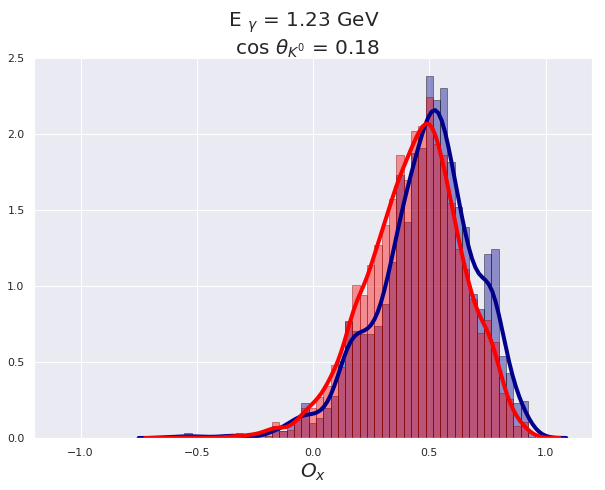

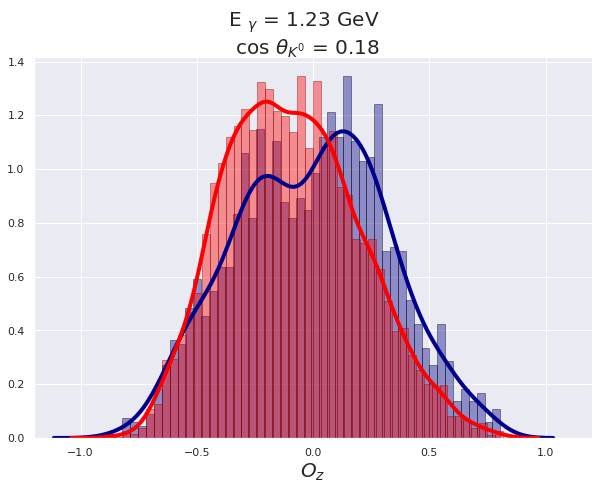

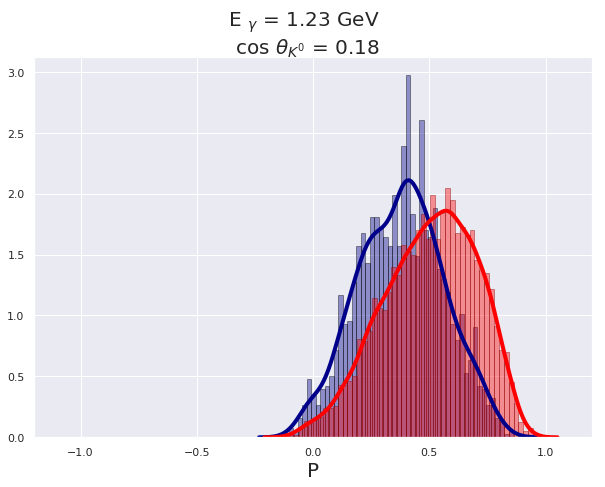

<Figure size 720x504 with 0 Axes>

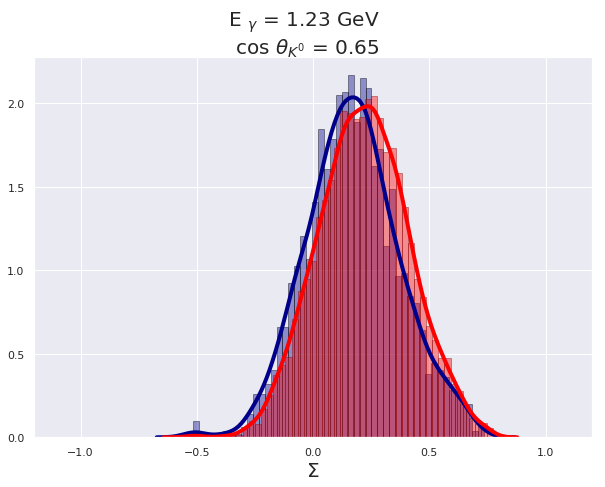

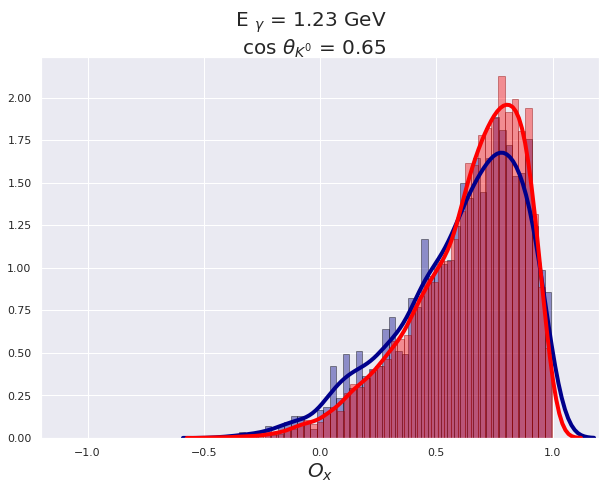

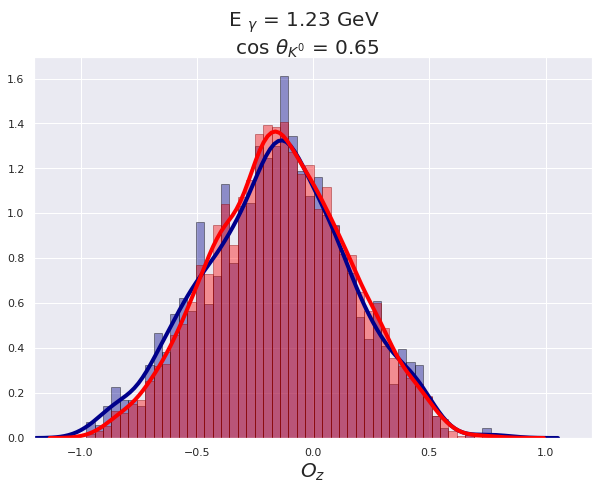

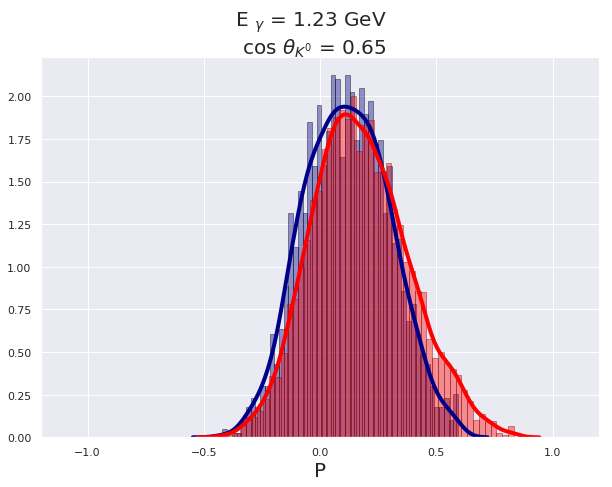

<Figure size 720x504 with 0 Axes>

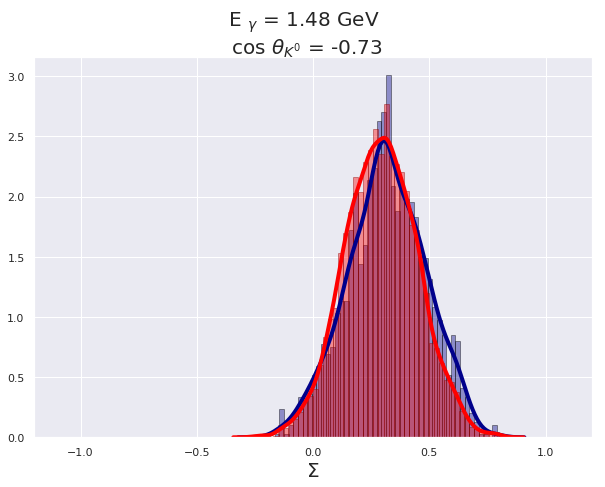

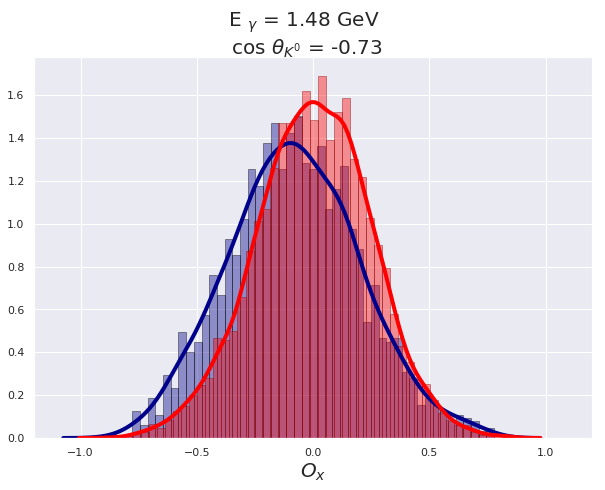

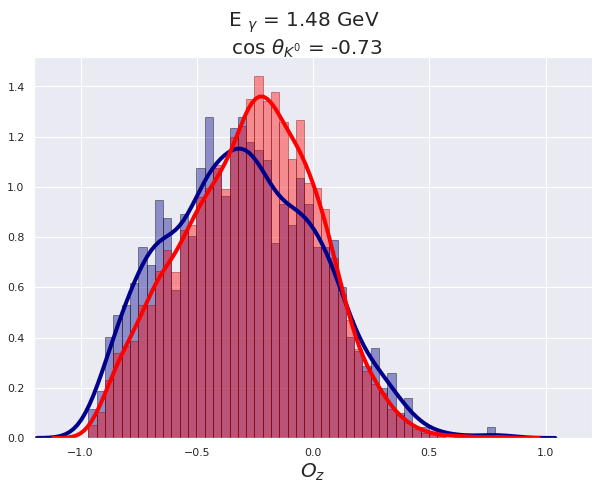

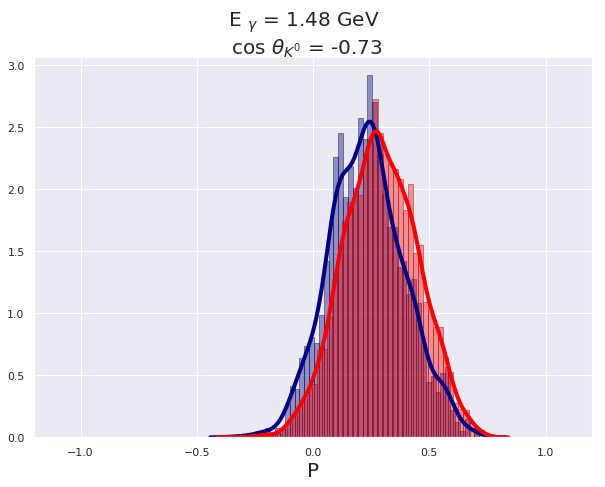

<Figure size 720x504 with 0 Axes>

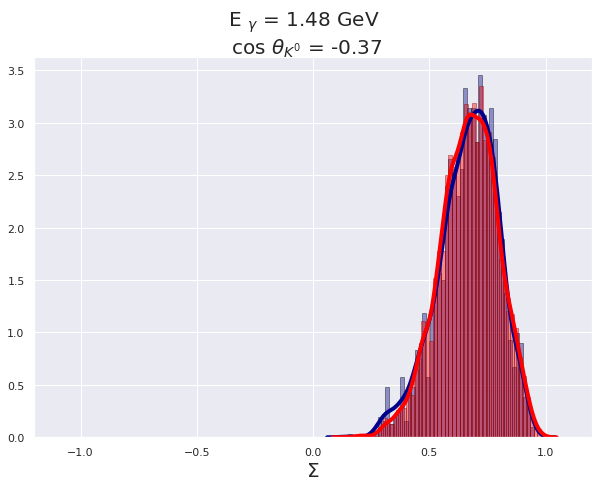

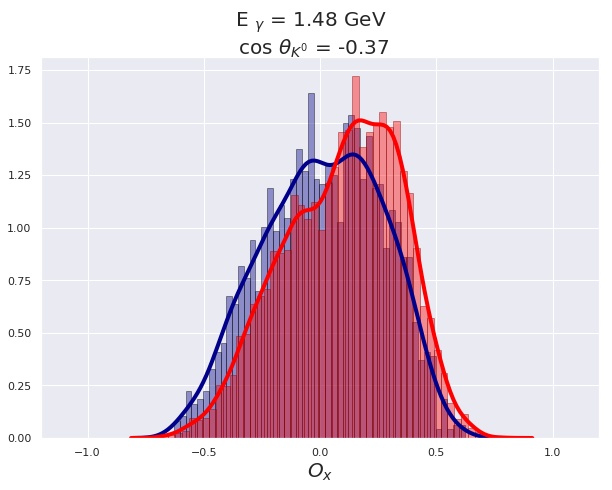

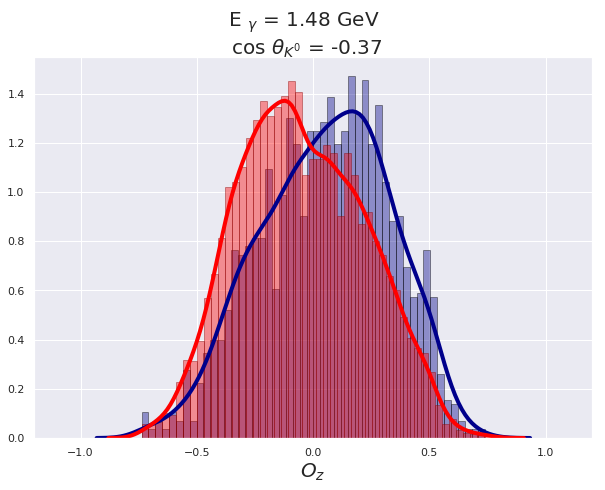

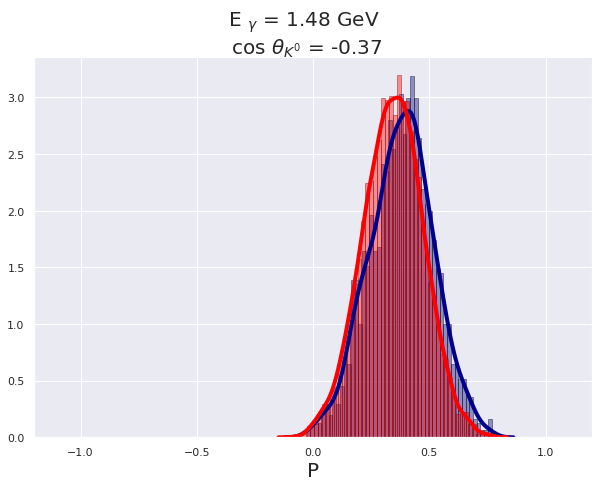

<Figure size 720x504 with 0 Axes>

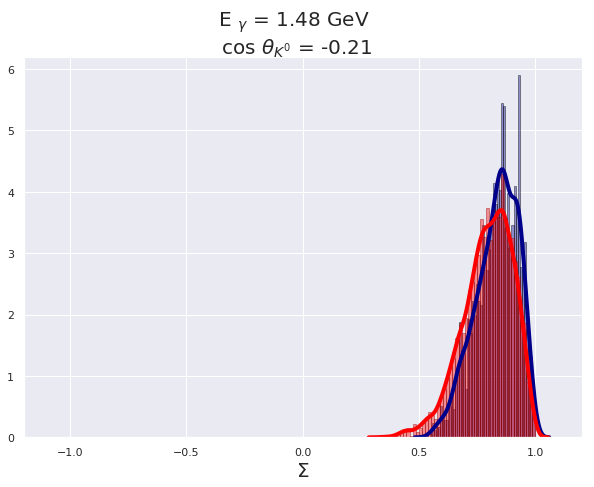

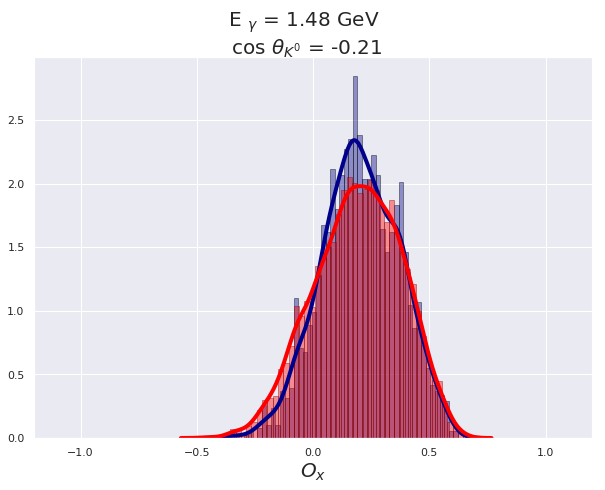

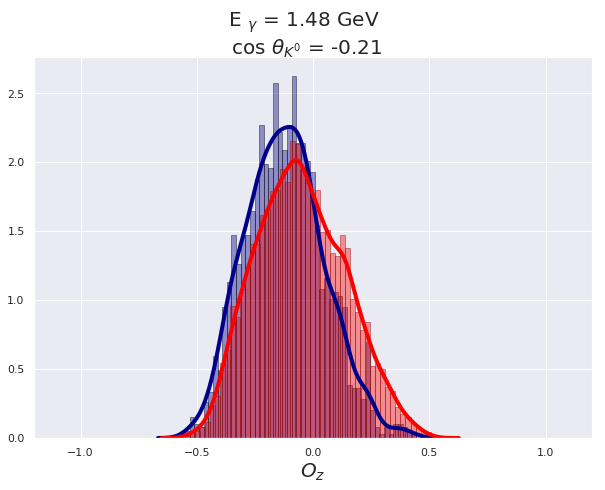

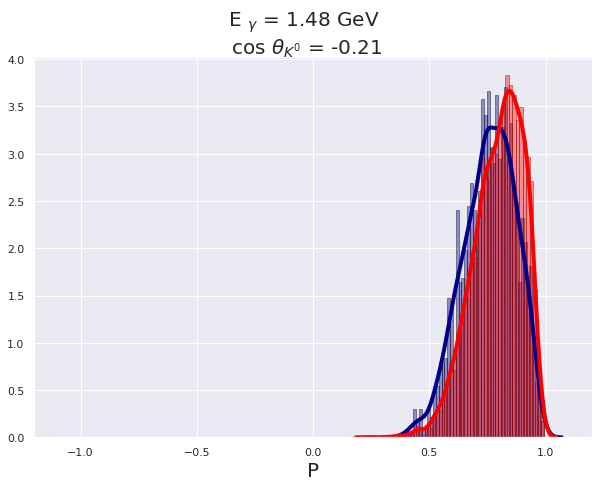

<Figure size 720x504 with 0 Axes>

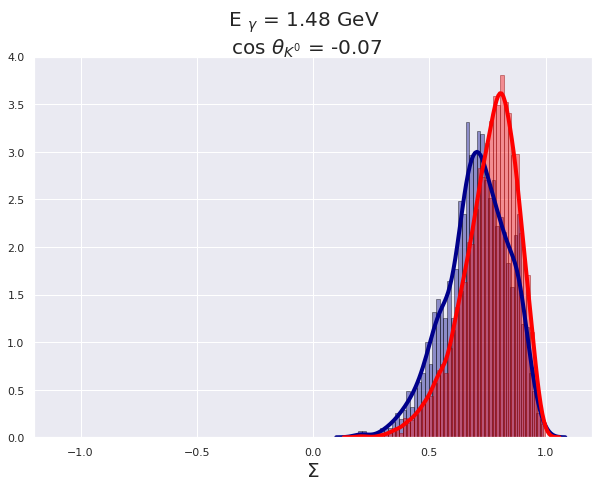

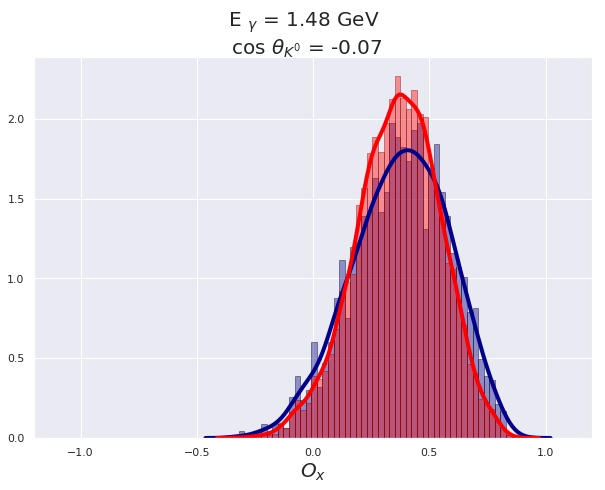

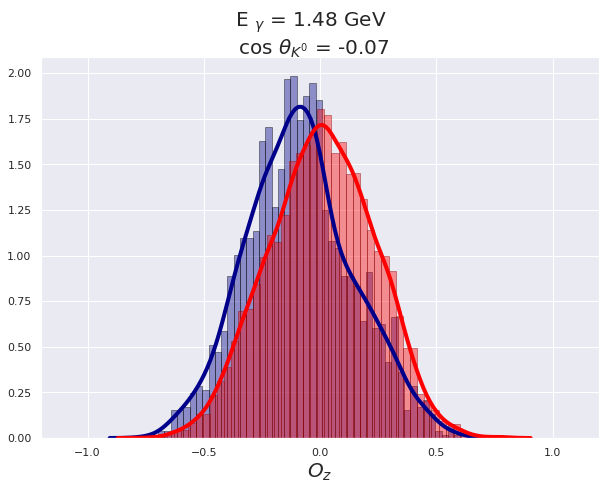

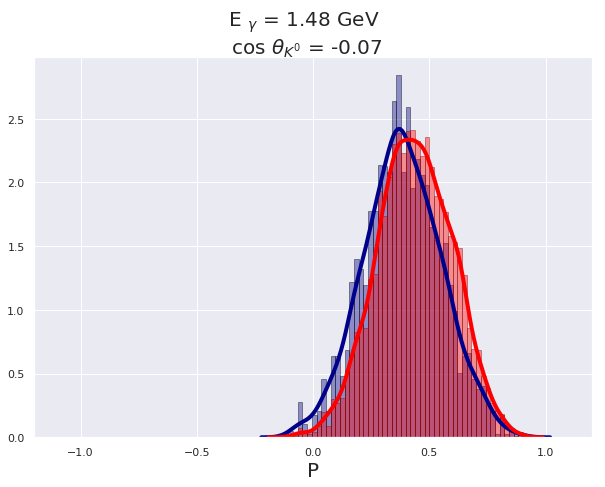

<Figure size 720x504 with 0 Axes>

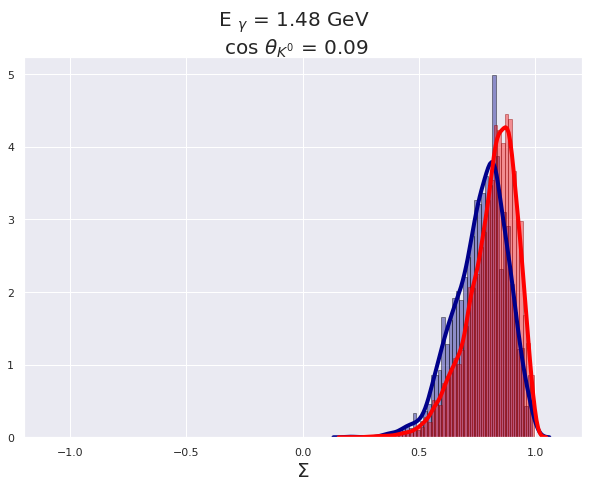

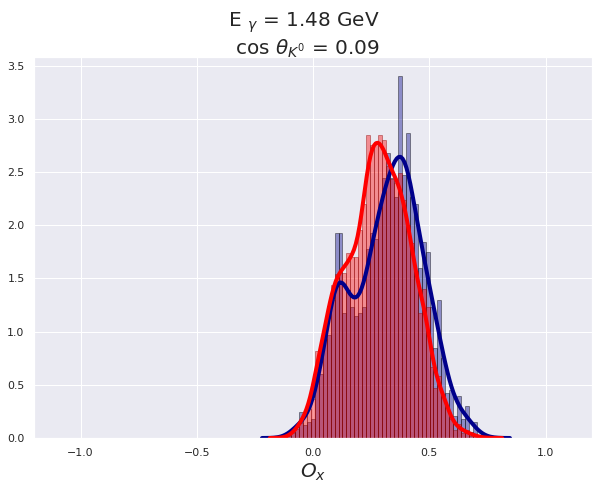

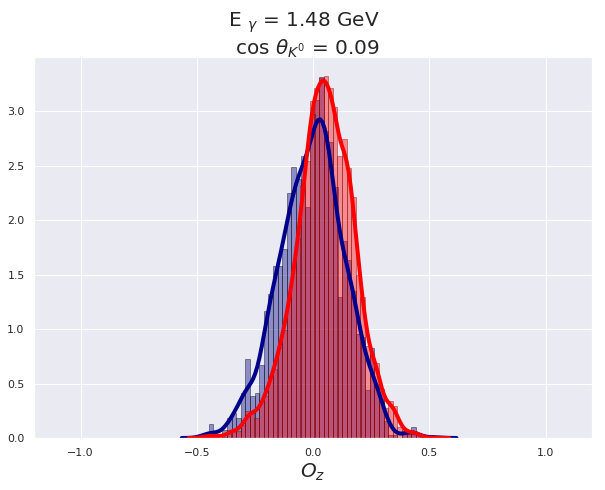

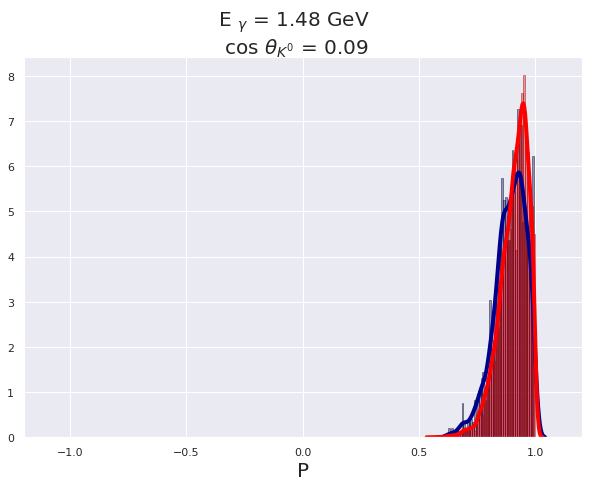

<Figure size 720x504 with 0 Axes>

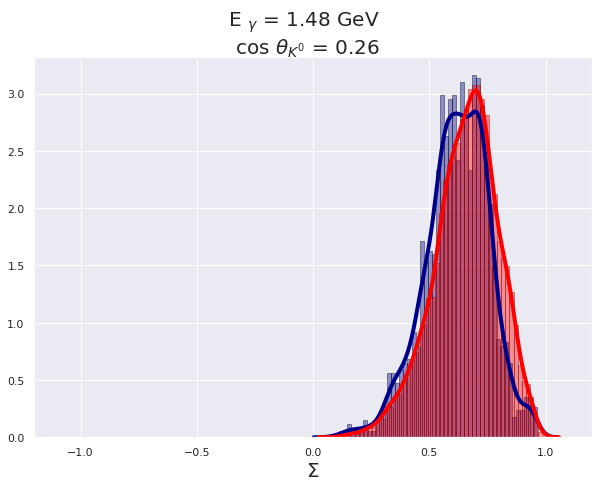

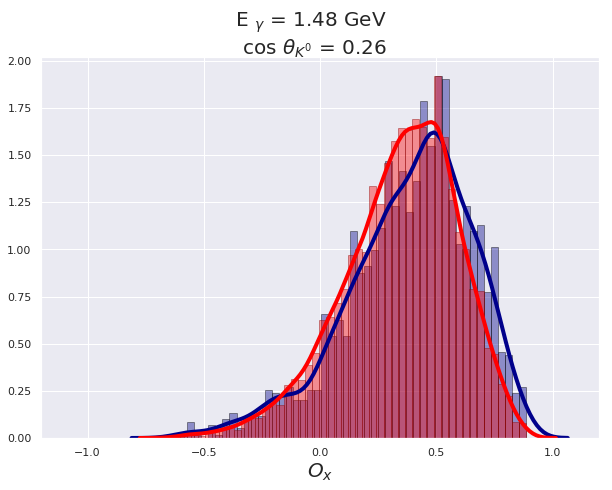

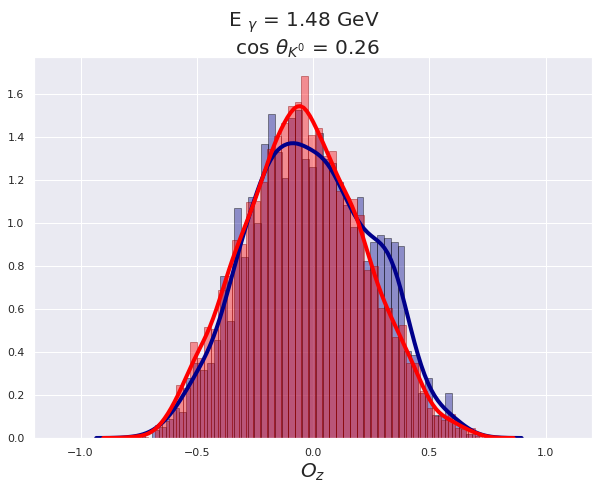

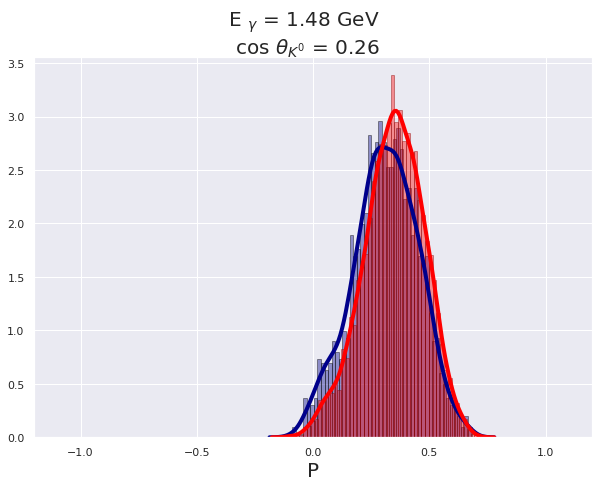

<Figure size 720x504 with 0 Axes>

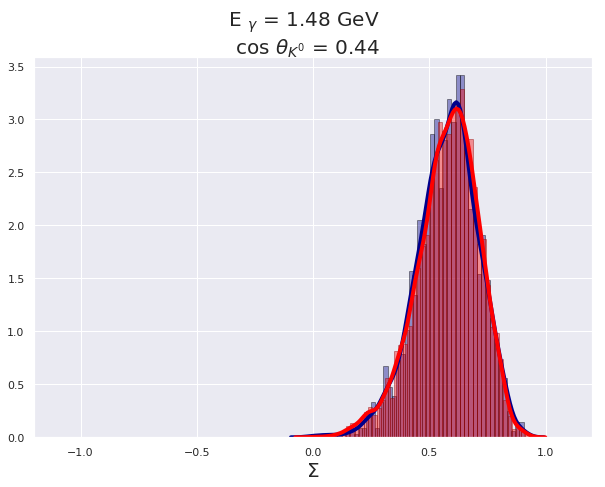

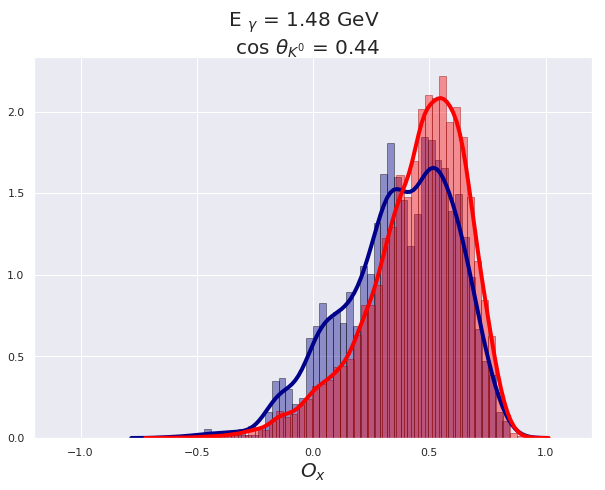

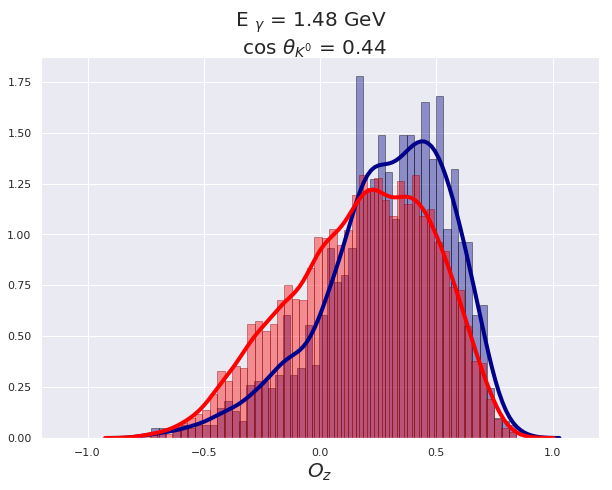

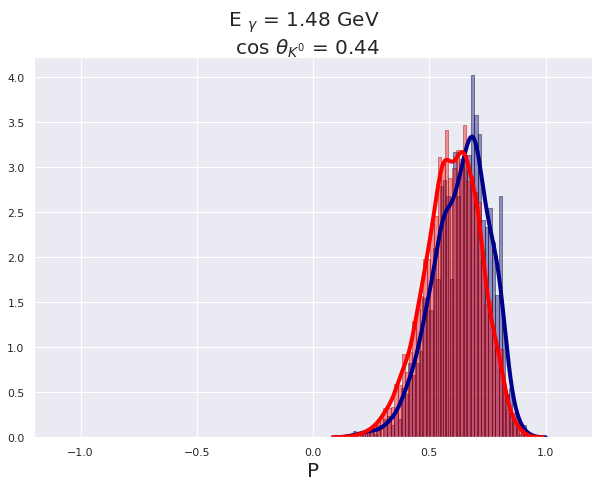

<Figure size 720x504 with 0 Axes>

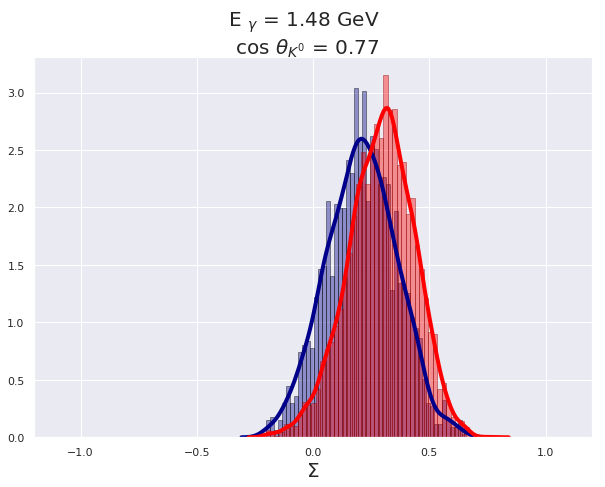

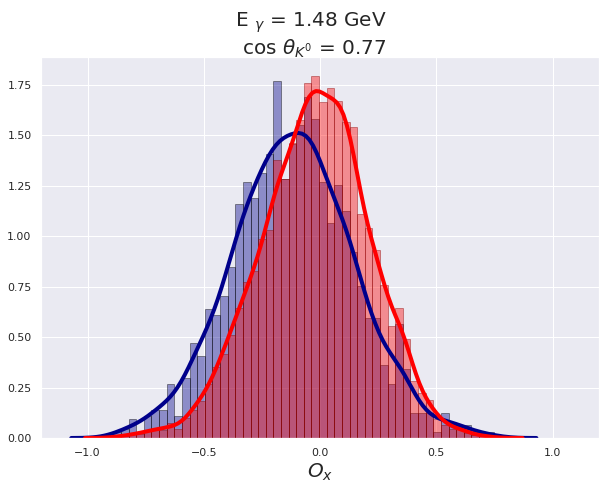

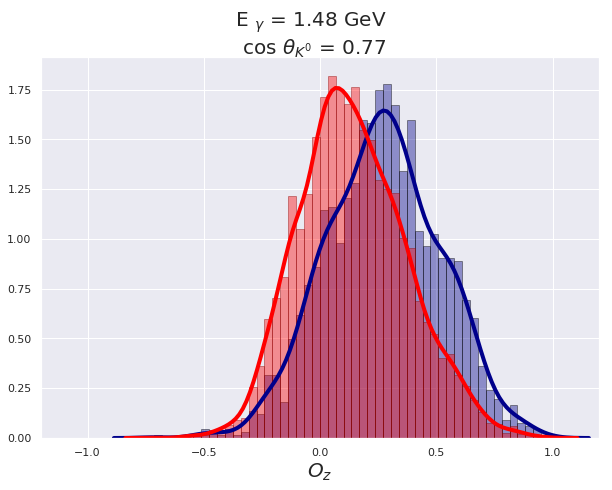

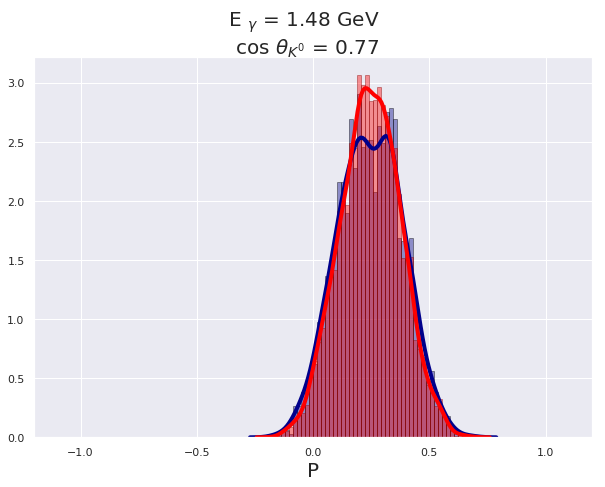

<Figure size 720x504 with 0 Axes>

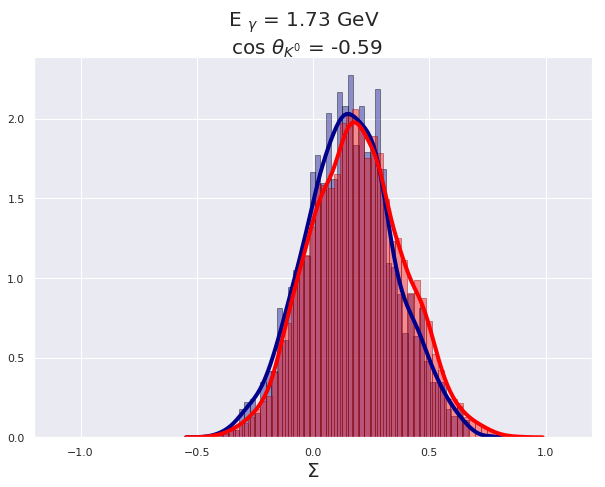

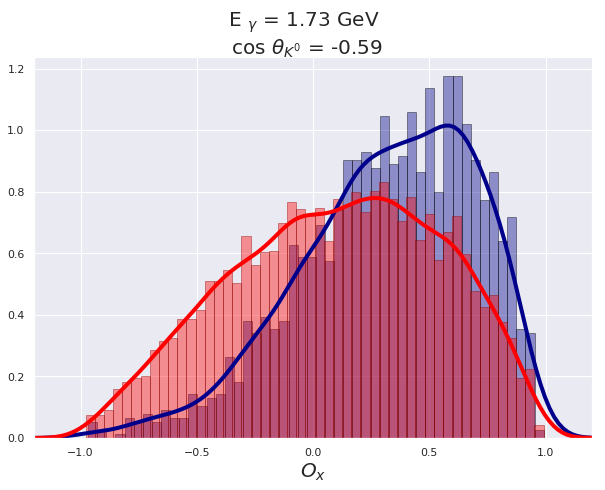

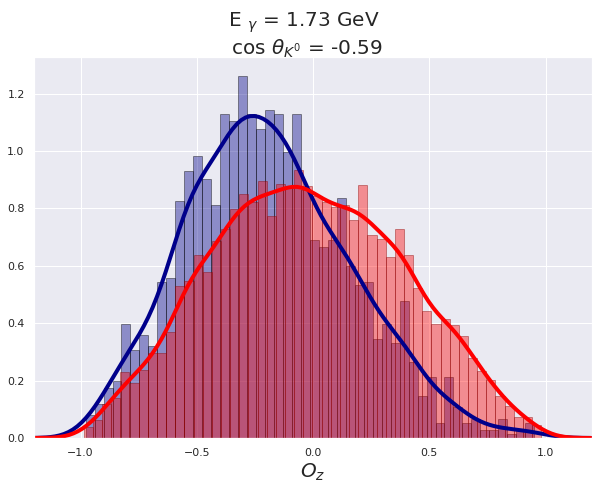

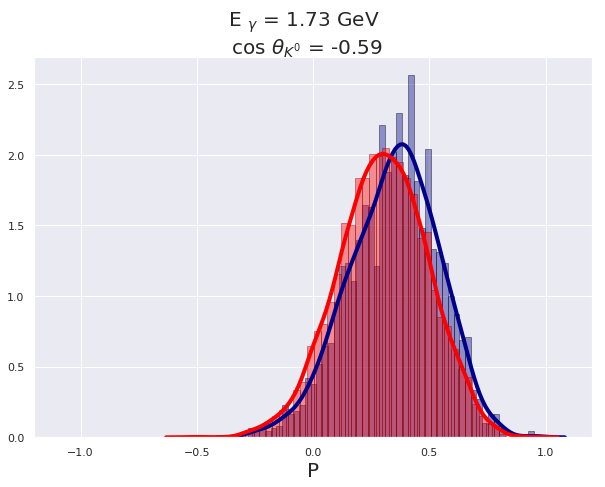

<Figure size 720x504 with 0 Axes>

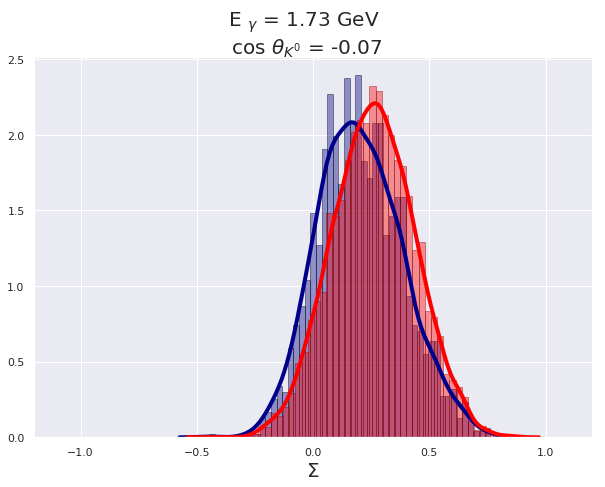

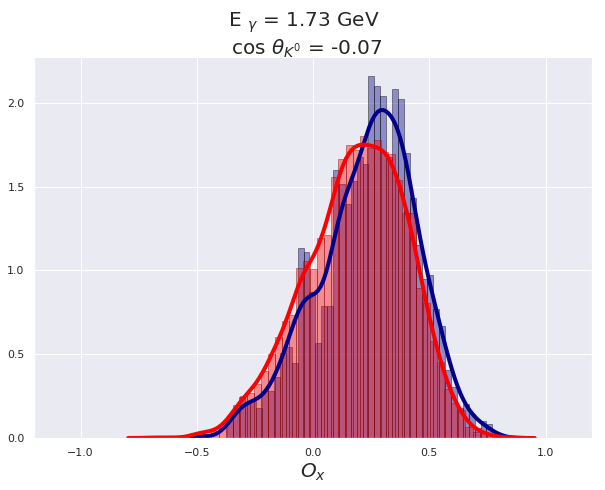

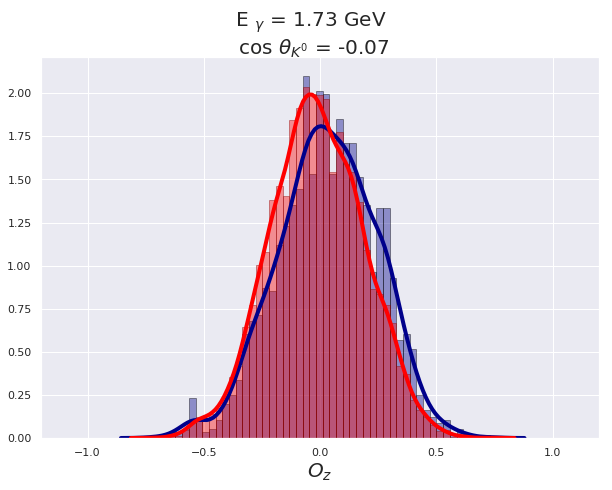

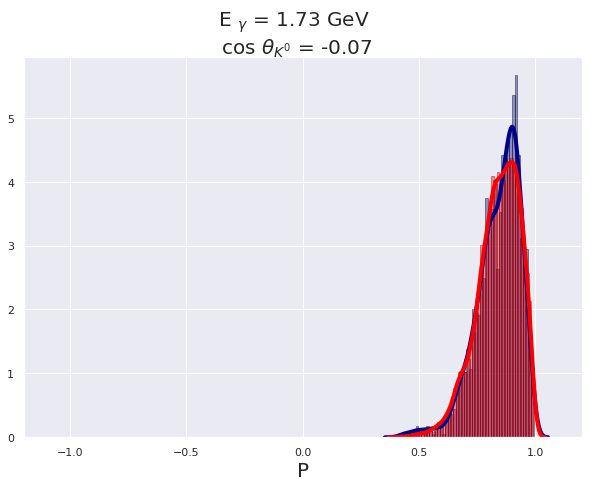

<Figure size 720x504 with 0 Axes>

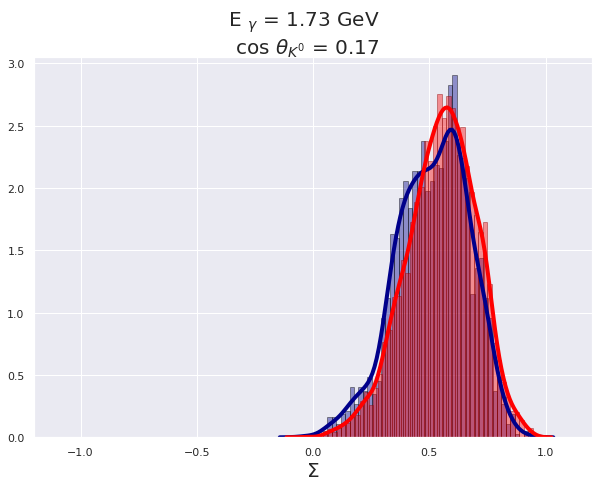

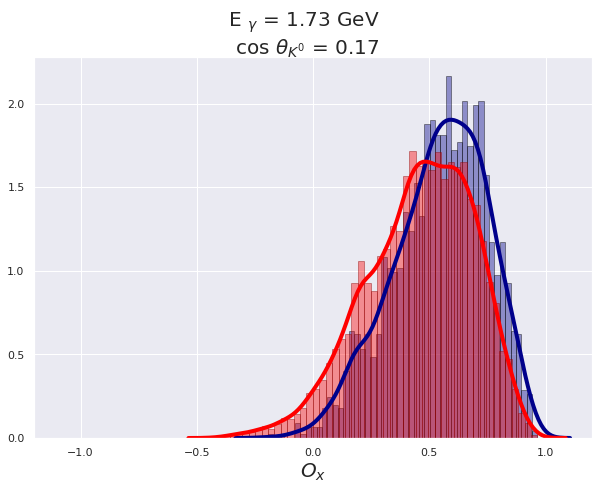

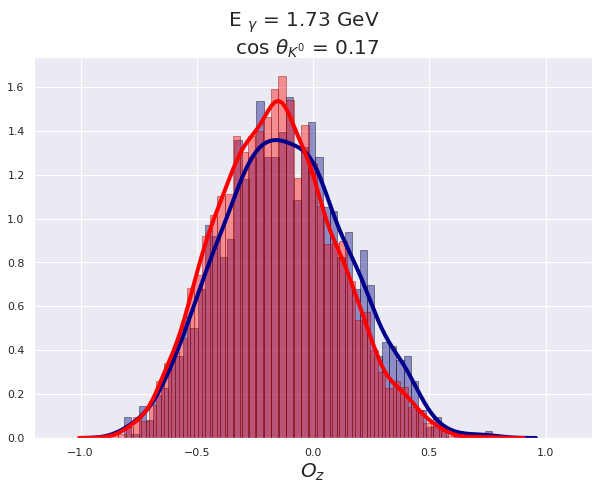

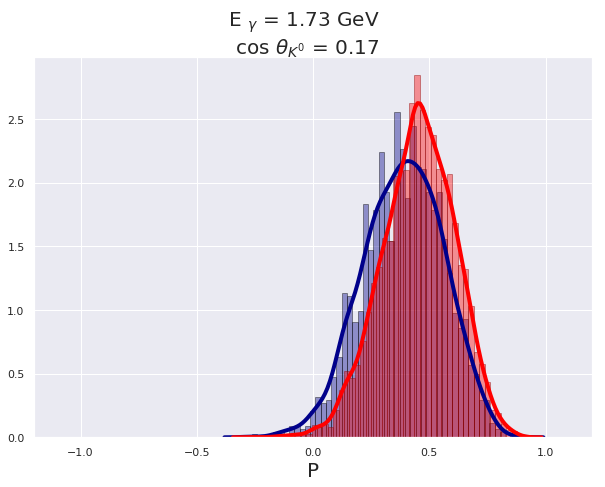

<Figure size 720x504 with 0 Axes>

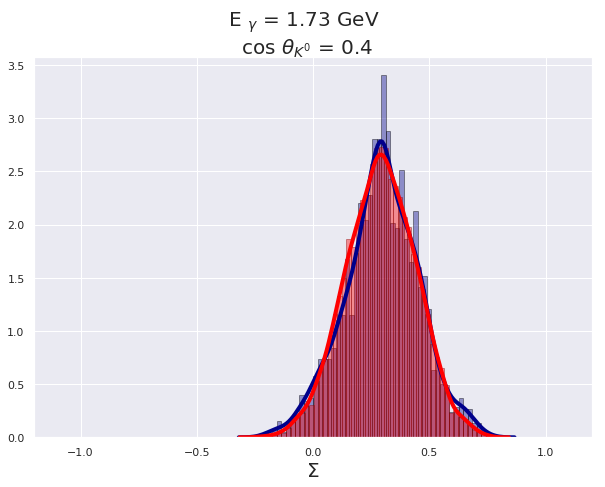

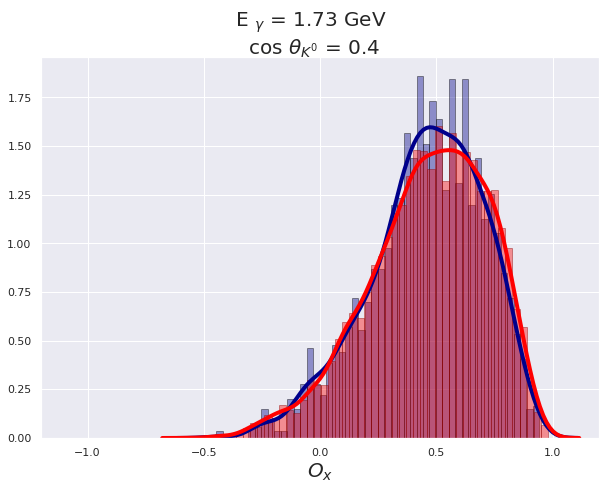

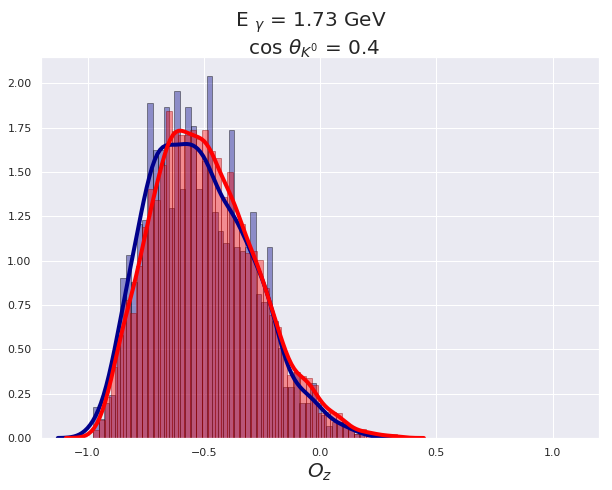

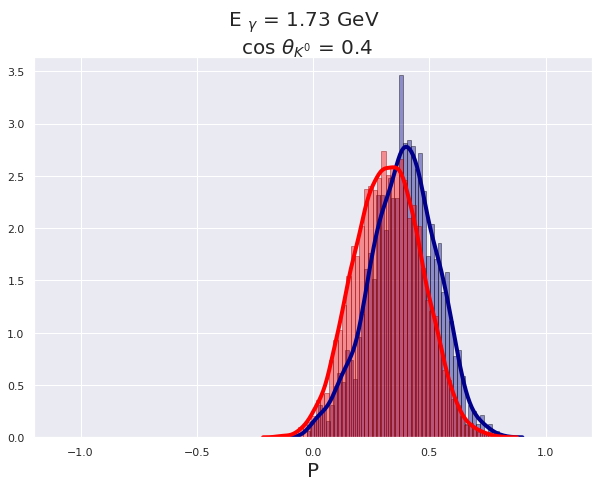

<Figure size 720x504 with 0 Axes>

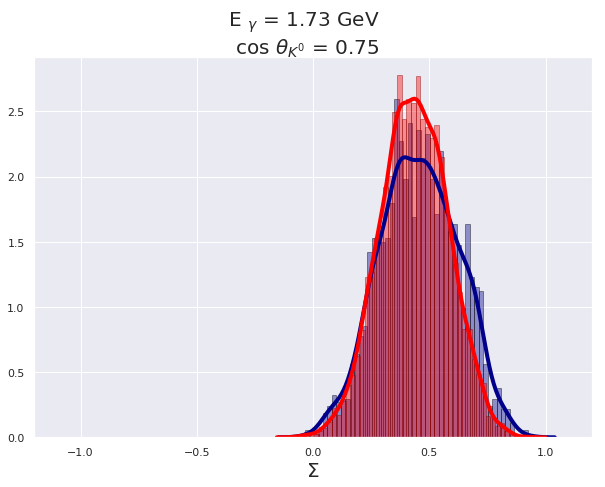

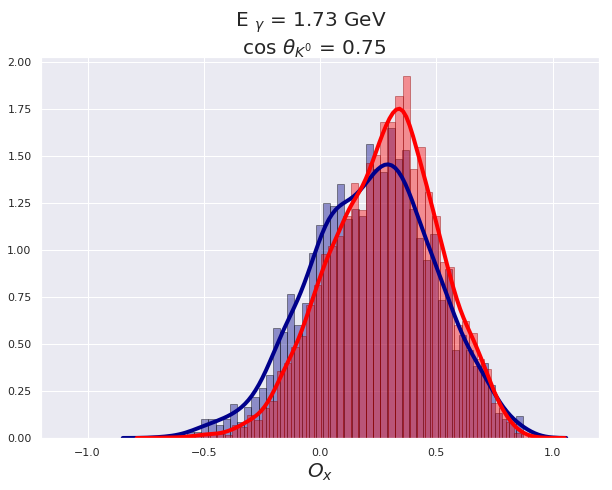

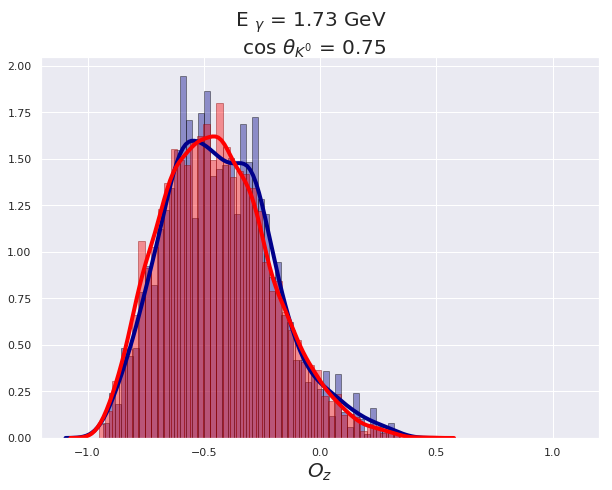

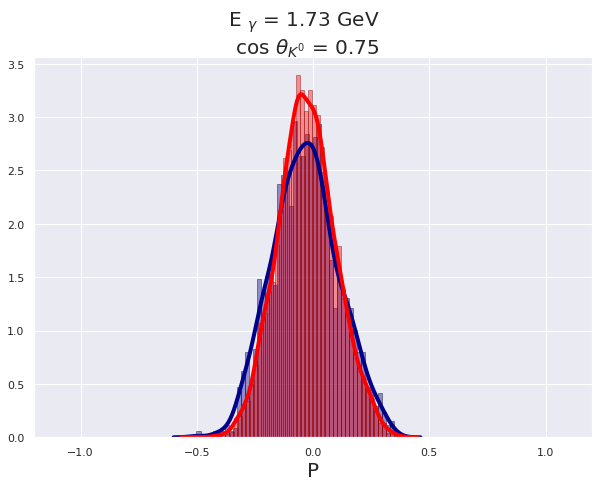

<Figure size 720x504 with 0 Axes>

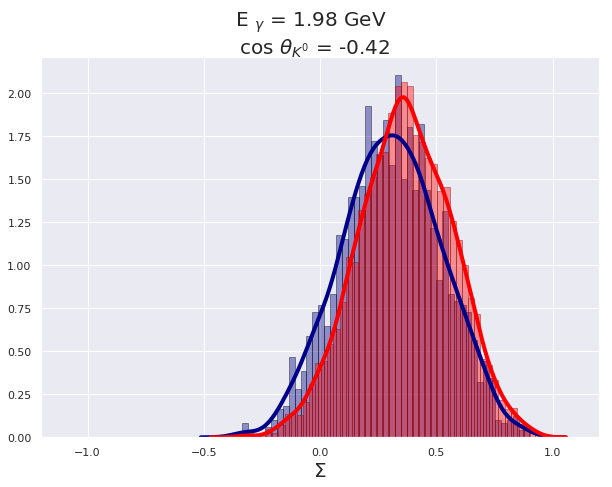

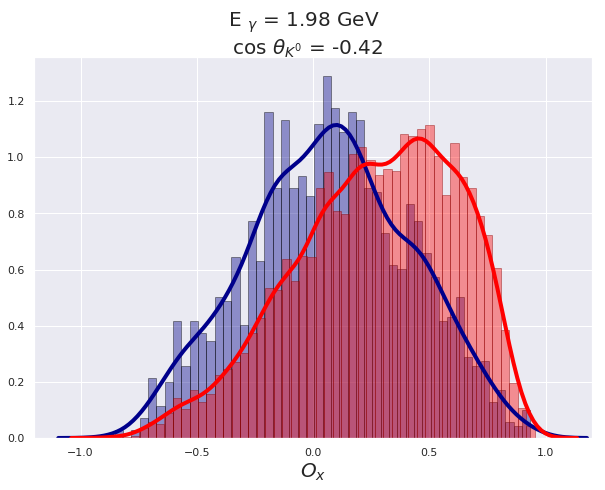

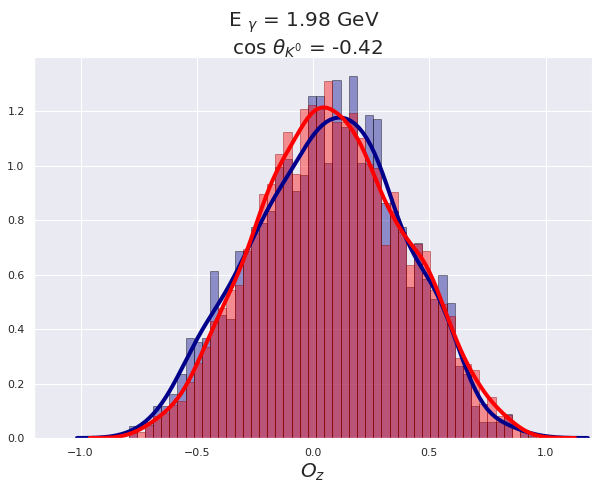

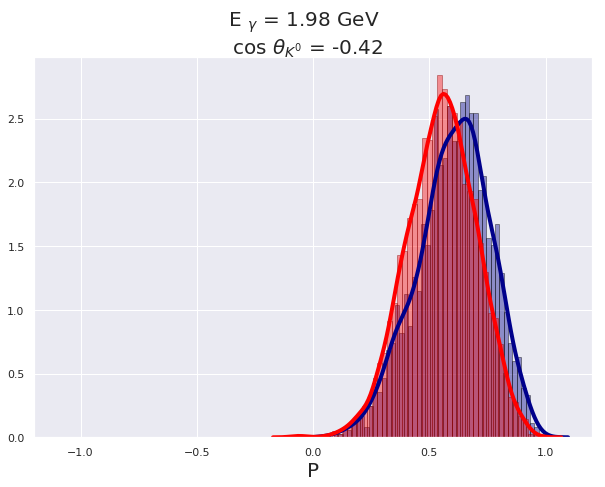

<Figure size 720x504 with 0 Axes>

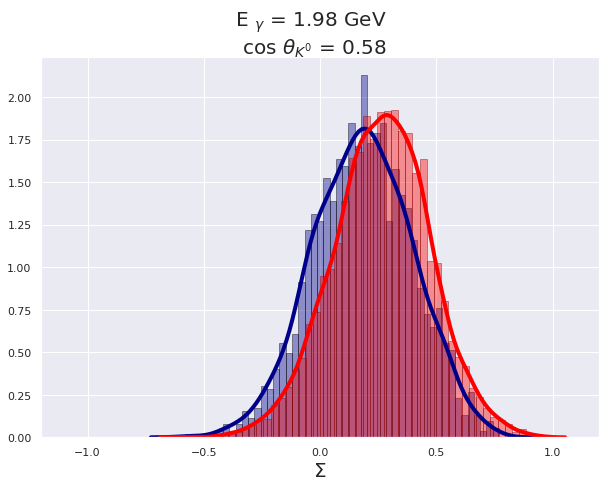

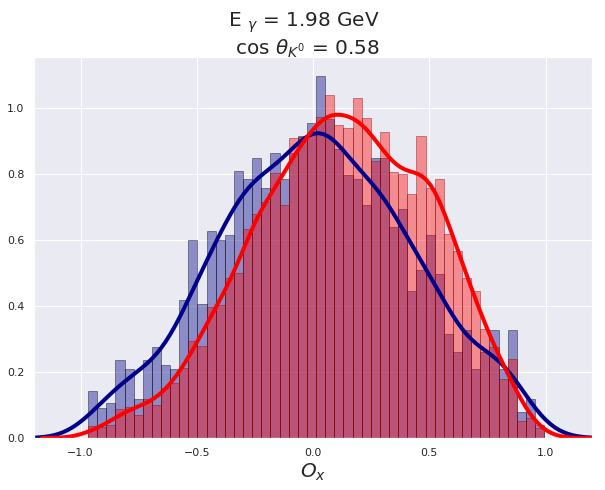

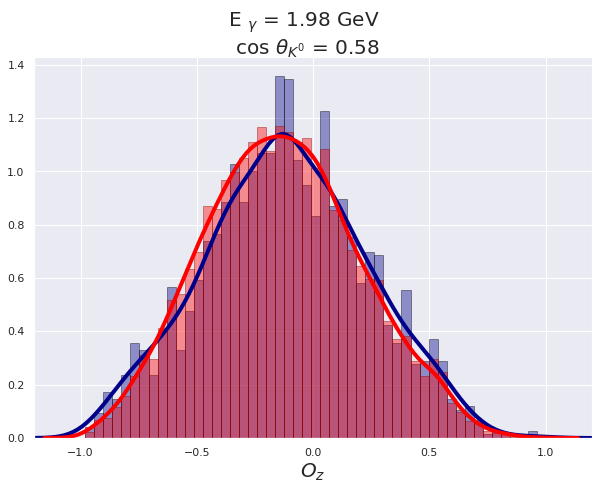

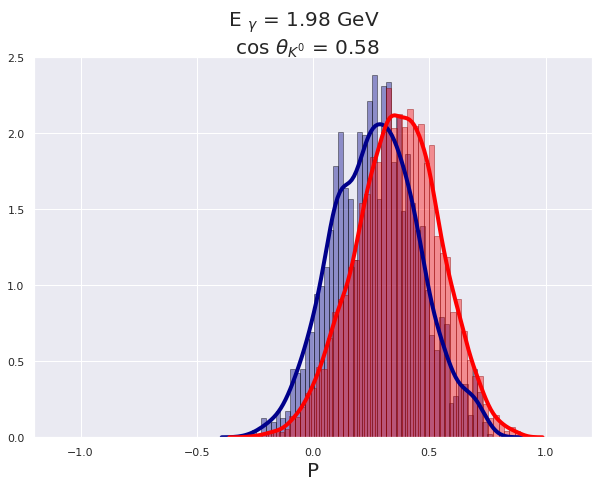

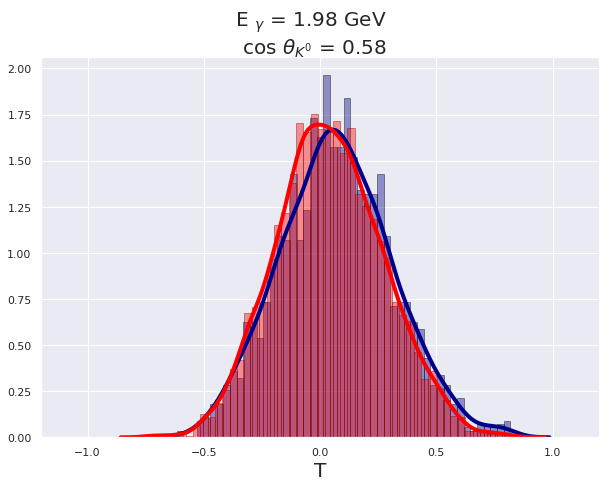

In [14]:
# KDE plots for all bins
imageDir = topDir+'MCMCKde/'

# obs
n_obs = len(obs_labels)
axLabels=['$\Sigma$','$O_x$','$O_z$','P','T']

# add a column to the dataframe for bin start (0.02 bin width)
csv_df['binStart'] = ((csv_df['Val'] * 100) // 2) / 50
mergedcsv_df['binStart'] = ((mergedcsv_df['Val'] * 100) // 2) / 50

print(csv_df.head())

for ebin_idx in range(len(Eg_bins)):
    for tbin_idx in range(len(costh_bins[ebin_idx])):
        plt.clf()
        #fig, axes = plt.subplots(n_obs, figsize=(20, 15))
        
        # get the bin
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[ebin_idx]]
        dfCosth = dfEg[dfEg['costh']==costh_bins[ebin_idx][tbin_idx]]
        mergeddfEg = mergedcsv_df[mergedcsv_df['Egamma']==Eg_bins[ebin_idx]]
        mergeddfCosth = mergeddfEg[mergeddfEg['costh']==costh_bins[ebin_idx][tbin_idx]]
        
        for i in range(n_obs):
            dfB = dfCosth[dfCosth['Obs']==obs_labels[i]]
            dfB = dfB.reset_index()
            mergeddfB = mergeddfCosth[mergeddfCosth['Obs']==obs_labels[i]]
            mergeddfB = mergeddfB.reset_index()

            fig, axes = plt.subplots(1, figsize=(10, 7))

            sns.distplot(dfB['Val'], hist=True, kde=True, 
                             bins=50, color = 'darkblue', 
                             hist_kws={'edgecolor':'black'},
                             kde_kws={'linewidth': 4, 'bw': 'scott'})
            sns.distplot(mergeddfB['Val'], hist=True, kde=True, 
                             bins=50, color = 'red', 
                             hist_kws={'edgecolor':'darkred'},
                             kde_kws={'linewidth': 4, 'bw': 'scott'})
            #axes = dfB['Val'].plot.kde()
            #axes = dfB['Val'].plot.hist()
            axes.set_xlabel(axLabels[i], fontsize=20)
            axes.set_xlim(-1.2,1.2)

            fig.suptitle(r'E $_{\gamma}$ = ' + str(Eg_bins[ebin_idx]) + ' GeV\n '+
                      r'cos $\theta _{K^0}$ = ' + str(costh_bins[ebin_idx][tbin_idx]), fontsize=20)
            #fig.legend(fontsize=14, loc="lower right")
            plt.savefig(imageDir+str(ebin_idx)+str(tbin_idx)+obs_labels[i]+"kde.png")
            #plt.clf()
        


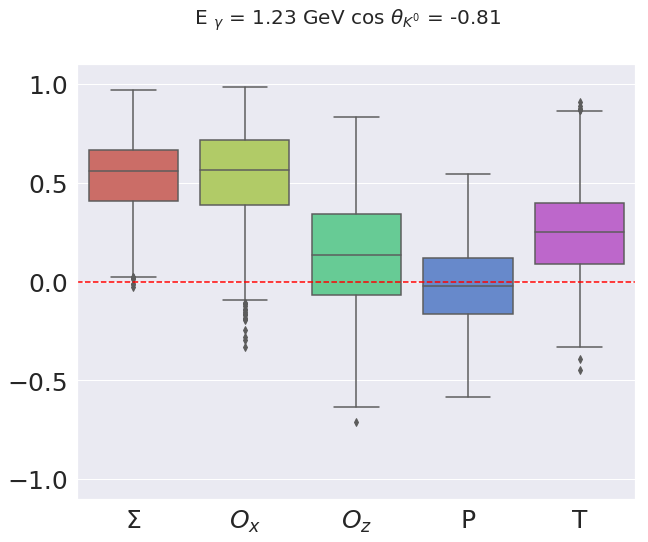

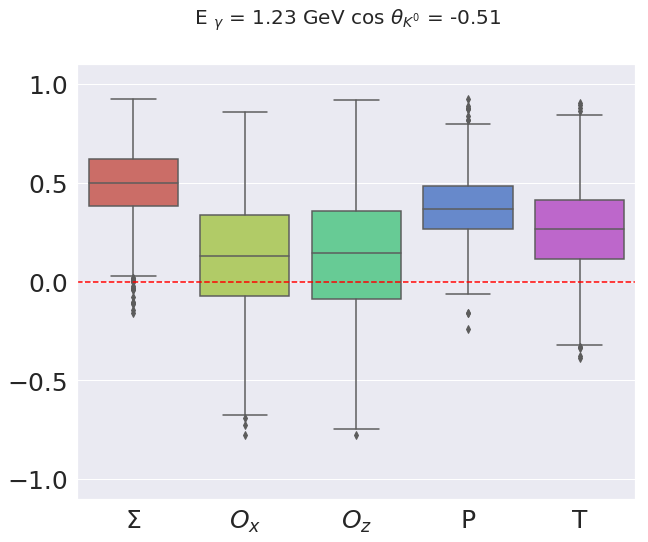

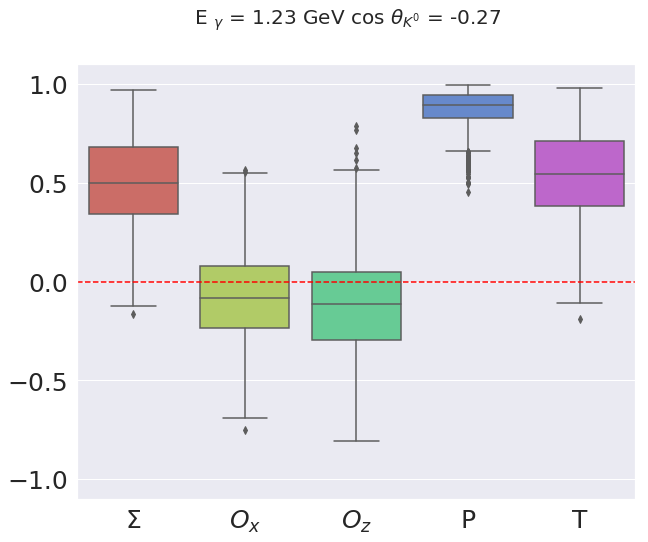

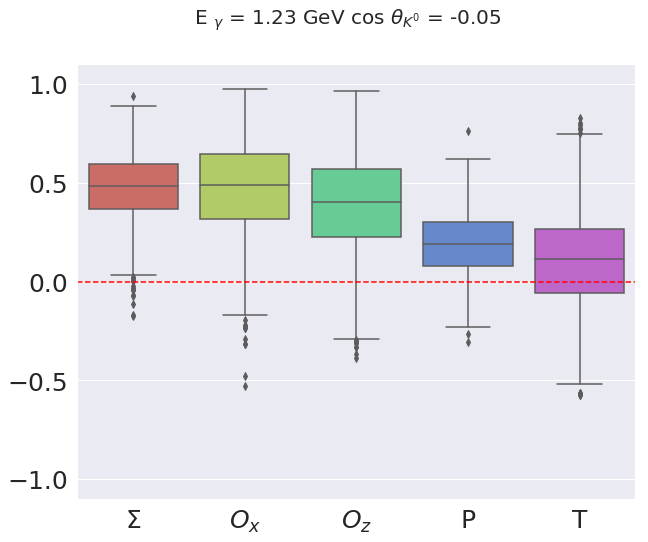

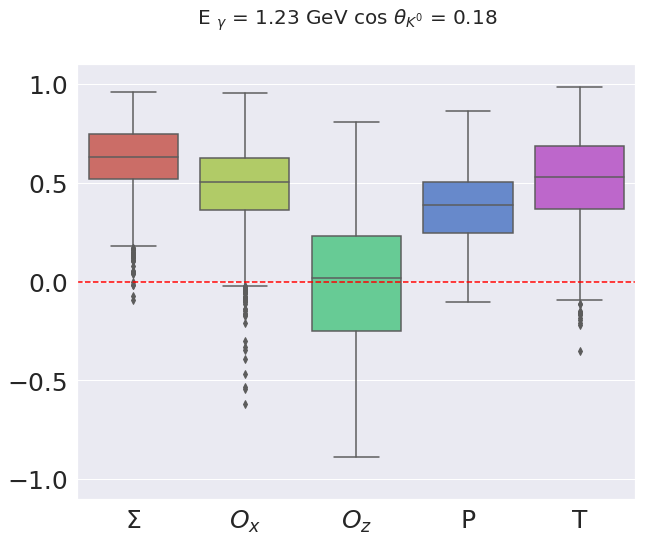

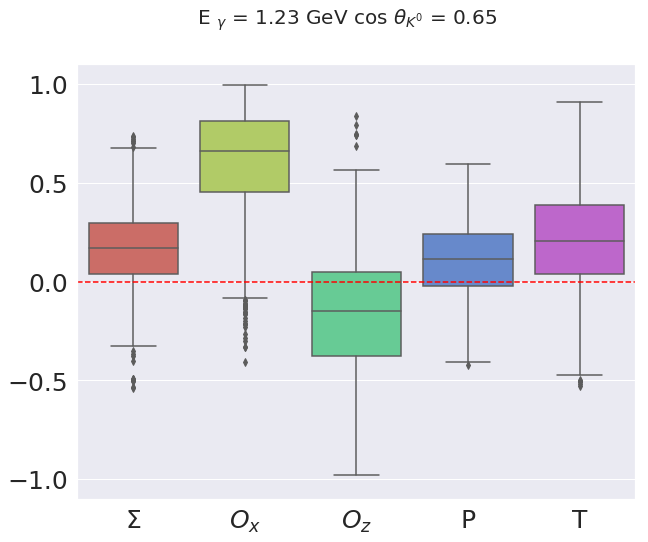

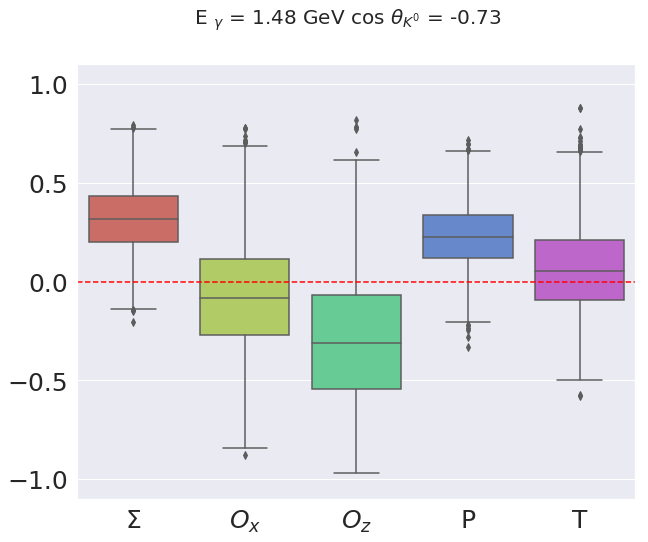

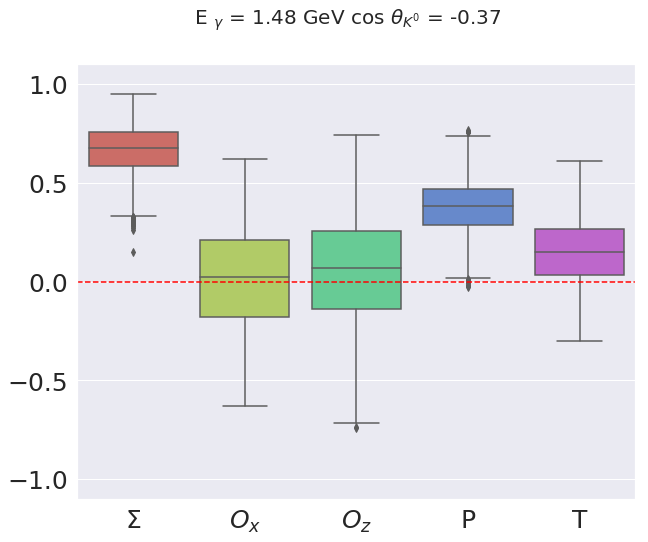

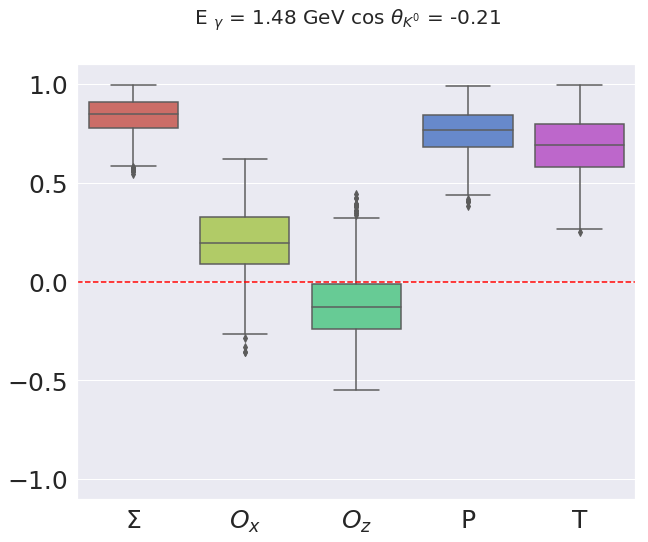

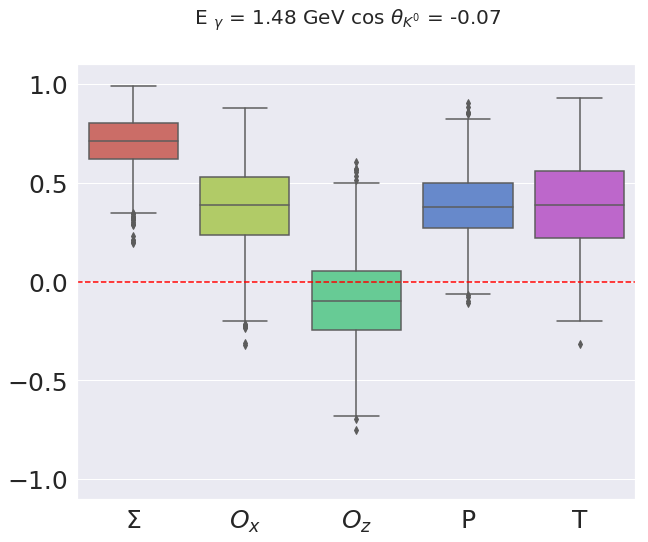

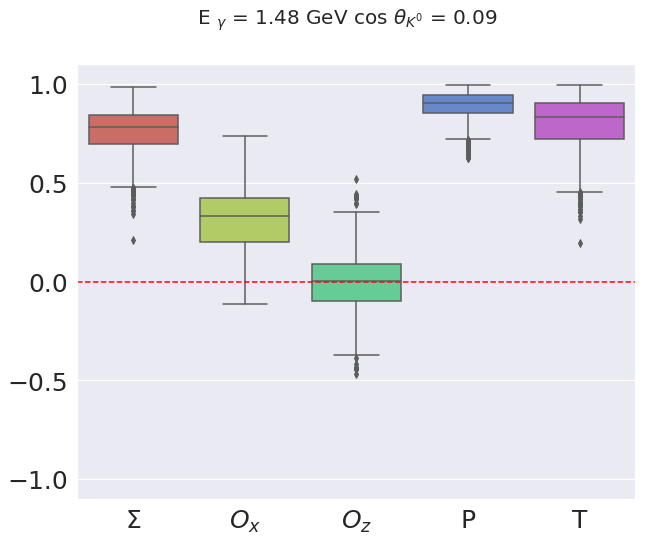

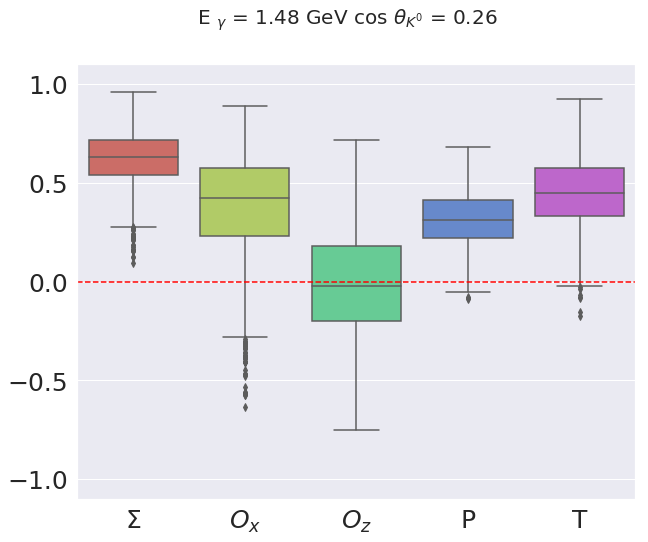

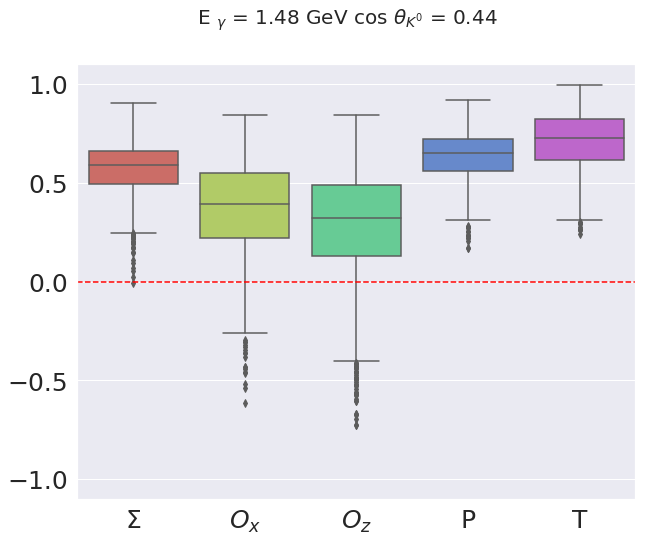

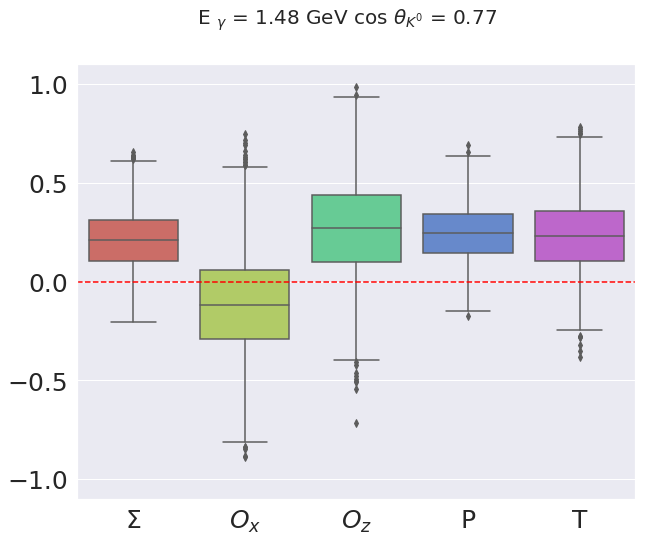

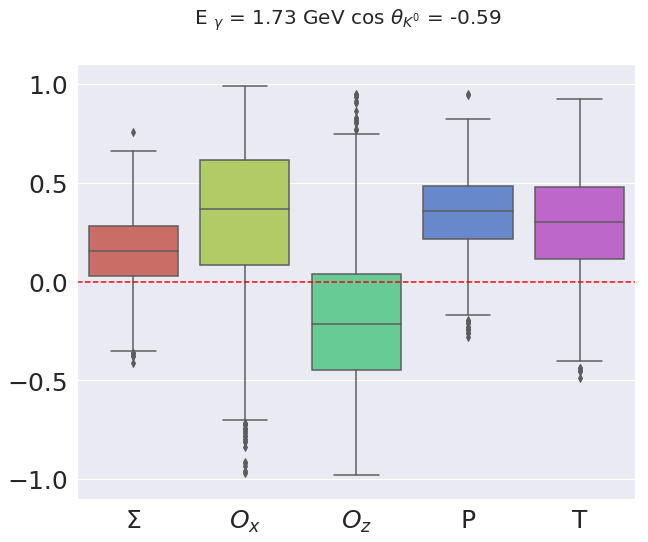

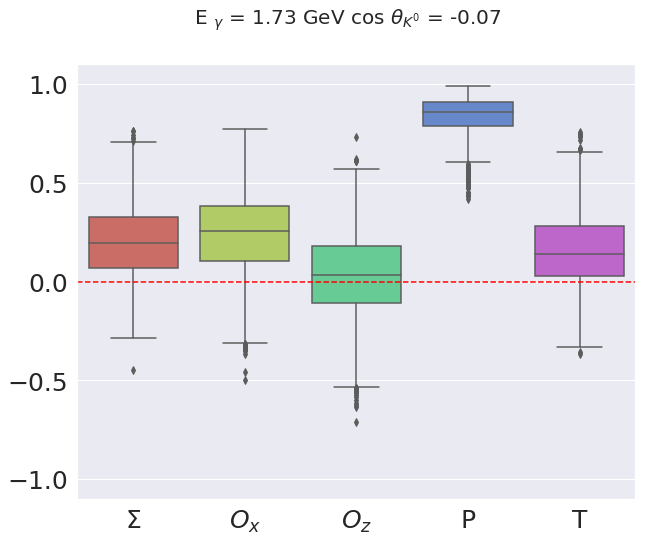

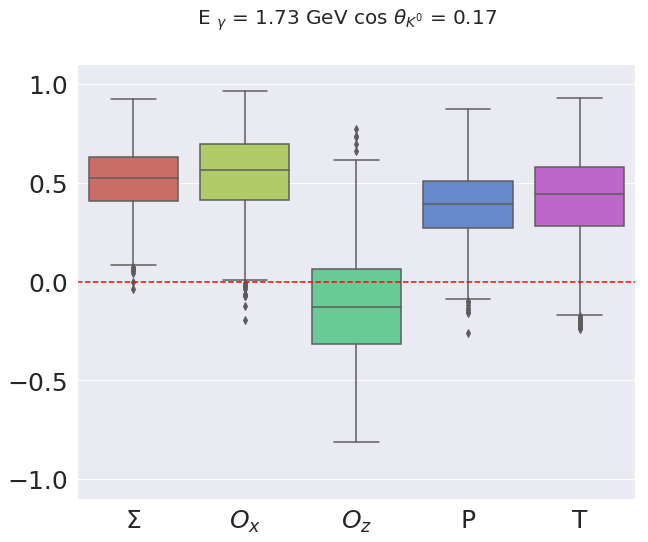

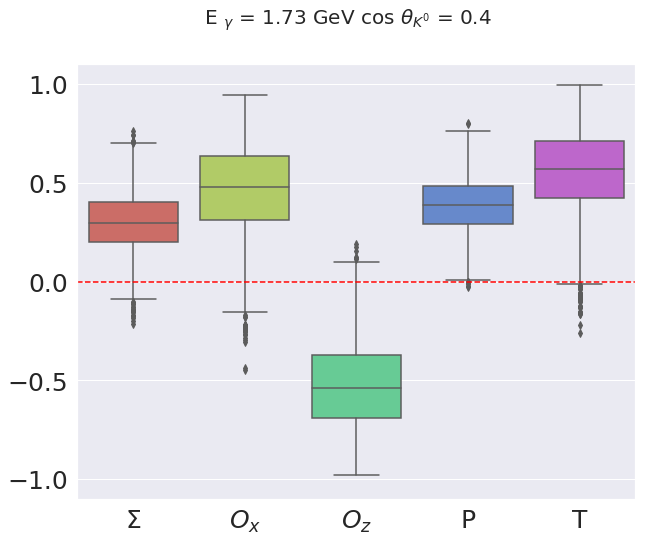

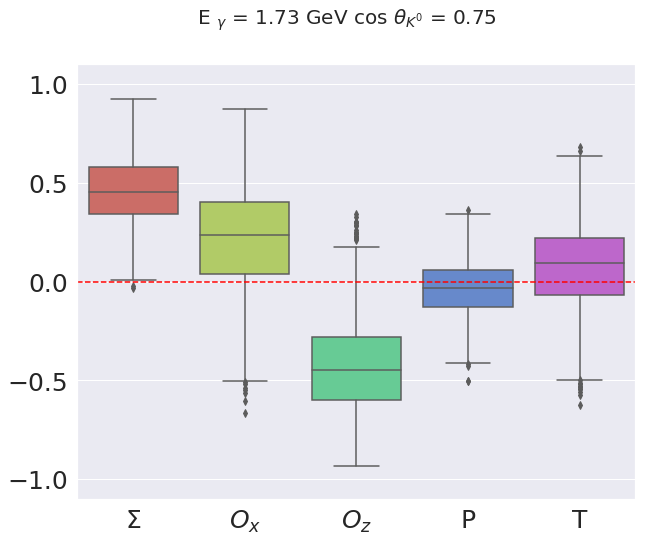

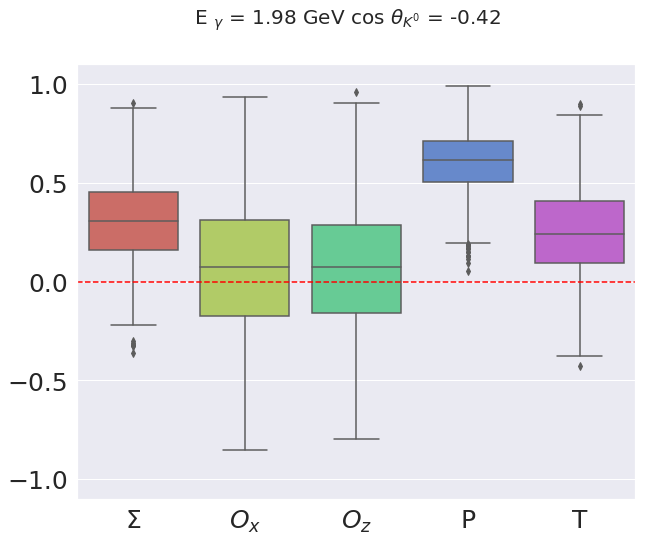

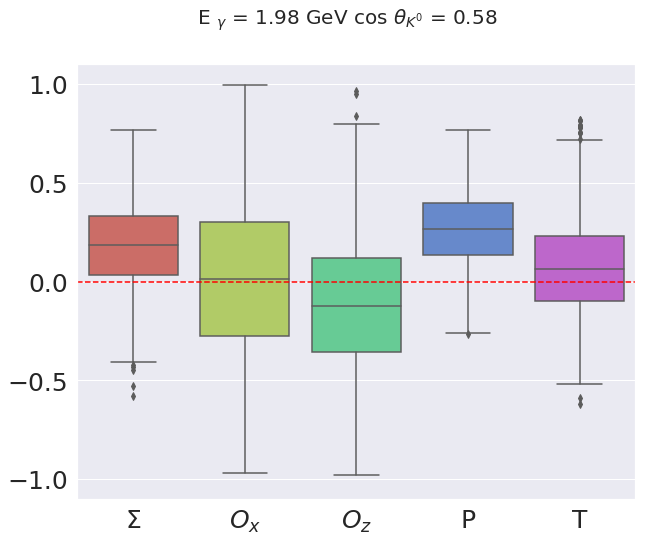

In [15]:
# observable box plots for all bins

Eg_bins = [1.23,1.48,1.73,1.98]
costh_bins = [[-0.81,-0.51,-0.27,-0.05,0.18,0.65],
              [-0.73,-0.37,-0.21,-0.07,0.09,0.26,0.44,0.77],
              [-0.59,-0.07,0.17,0.40,0.75],
              [-0.42, 0.58]
             ]

for ebin_idx in range(len(Eg_bins)):
    for tbin_idx in range(len(costh_bins[ebin_idx])):
        # get the bin
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[ebin_idx]]
        dfCosth = dfEg[dfEg['costh']==costh_bins[ebin_idx][tbin_idx]]

        # get df for each obs
        dfB = dfCosth[dfCosth['Obs']=='B']
        dfB = dfB.reset_index()
        dfOx = dfCosth[dfCosth['Obs']=='Ox']
        dfOx = dfOx.reset_index()
        dfOz = dfCosth[dfCosth['Obs']=='Oz']
        dfOz = dfOz.reset_index()
        dfR = dfCosth[dfCosth['Obs']=='R']
        dfR = dfR.reset_index()
        dfT = dfCosth[dfCosth['Obs']=='T']
        dfT = dfT.reset_index()

        # merge them
        dfObs = pd.concat([dfB['Val'], dfOx['Val'], dfOz['Val'], dfR['Val'], dfT['Val']], 
                  axis=1, keys=['B','Ox','Oz','R','T'])

        # Use cubehelix to get a custom sequential palette
        pal = sns.color_palette("hls", n_obs)

        # Show each distribution with both violins and points
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        bPlt = sns.boxplot(data=dfObs, palette=pal)

        ax.set_ylim(-1.1,1.1)
        ax.axhline(0.0,color='red',linestyle='--')
        ax.set_xticklabels(['$\Sigma$','$O_x$','$O_z$','P','T'])
        bPlt.tick_params(labelsize=25)
        
        fig.suptitle(r'E $_{\gamma}$ = ' + str(Eg_bins[ebin_idx]) + ' GeV '+
                      r'cos $\theta _{K^0}$ = ' + str(costh_bins[ebin_idx][tbin_idx]), fontsize=20)

        plt.show()